# **Project 29: Automatic Summarization 2**

### **Authors**:
- Roshan Fernando (roshaneranga.fernando@student.oulu.fi)
- Kavindu Ravishan (kavindu.magalage@student.oulu.fi)
- Ali Goodarzi (ali.goodarzi@student.oulu.fi)

---

## **Prerequisite Setup**

Before running the main tasks/questions, please ensure you execute the following setup steps in order:

### **1) Downloading and Extracting Project 29 ZIP File Using gdown in Python**

### **2) Setting Up Python Libraries for Text Processing and Summarization**

### **3) Python Libraries and Modules for Text Processing and Summarization Tasks**

### **4) Downloading the 'punkt' Tokenizer Models for NLTK**

---

🚀 **Now, you're all set!**  
Please ensure you've run all the cells above before proceeding with the main tasks/questions.

---



## 1) Downloading and Extracting Project 29 ZIP File Using gdown in Python

In [ ]:
!pip install gdown
import gdown

# Convert the Google Drive "view" link to the "direct download" link format
# https://drive.google.com/file/d/1Cqdoxh3o7JGAzWys85h478nVac3AtEMq/view?usp=sharing
url = 'https://drive.google.com/uc?id=1Cqdoxh3o7JGAzWys85h478nVac3AtEMq'
output = 'project-29.zip'
gdown.download(url, output, quiet=False)

# Unzip the downloaded file
!unzip project-29.zip

Downloading...
From: https://drive.google.com/uc?id=1Cqdoxh3o7JGAzWys85h478nVac3AtEMq
To: /content/project-29.zip
100%|██████████| 431k/431k [00:00<00:00, 43.2MB/s]

Archive:  project-29.zip
   creating: accuracy_garmin_nuvi_255W_gps/
  inflating: accuracy_garmin_nuvi_255W_gps/accuracy_garmin_nuvi_255W_gps.txt.data  
  inflating: accuracy_garmin_nuvi_255W_gps/accuracy_garmin_nuvi_255W_gps.1.gold  
  inflating: accuracy_garmin_nuvi_255W_gps/accuracy_garmin_nuvi_255W_gps.2.gold  
  inflating: accuracy_garmin_nuvi_255W_gps/accuracy_garmin_nuvi_255W_gps.3.gold  
  inflating: accuracy_garmin_nuvi_255W_gps/accuracy_garmin_nuvi_255W_gps.4.gold  
  inflating: accuracy_garmin_nuvi_255W_gps/accuracy_garmin_nuvi_255W_gps.5.gold  
   creating: task-02/
  inflating: task-02/paper.pdf       
   creating: task-08/
  inflating: task-08/10-s2.0-main.gold  
  inflating: task-08/9-s2.0-main.gold  
  inflating: task-08/4-s2.0-main.gold  
  inflating: task-08/9-s2.0-main.txt.data  
  inflating: task-08/5-s2.0-main.txt.data  
  inflating: task-08/1-s2.0-main.gold  
  inflating: task-08/2-s2.0-main.txt.data  
  inflating: task-08/2-s2.0-main.gold  
  inflating: task-08/3

## 2) Setting Up Python Libraries for Text Processing and Summarization

In [ ]:
# PyPDF2 is a library for reading and manipulating PDF files.
!pip install PyPDF2

# The rouge library provides a Python implementation of the ROUGE metric, used for evaluating automatic summaries.
!pip install rouge

# spaCy is a library for advanced Natural Language Processing in Python.
# The command below downloads the medium-sized English model "en_core_web_md" for spaCy.
# This model includes word vectors, POS tags, dependency parses, and named entities.
!python -m spacy download en_core_web_md

# Sumy is a Python library for extractive summarization of texts. It provides various algorithms to generate summaries.
!pip install sumy

# RAKE (Rapid Automatic Keyword Extraction) is an algorithm used to extract key phrases from text.
!pip install python-rake

!pip install prettytable



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.4 MB/s eta 0:00:00
2023-10-27 09:55:03.016935: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-27 09:55:03.017020: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-27 09:55:03.017057: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-27 09:55:03.028335: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with 

## 3) Python Libraries and Modules for Text Processing and Summarization Tasks



In [ ]:
"""
Modules and Utilities for Task 01
"""
# Provides regular expression operations. Regular expressions are a powerful tool for matching and manipulating text.
import re
# Provides a variety of natural language processing (NLP) tools, including tokenization, stemming, lemmatization, parsing, and tagging.
import nltk
# Variety of functions for manipulating strings
import string
# library for parsing HTML and XML documents. It is useful for extracting data from web pages.
from bs4 import BeautifulSoup
# library for making HTTP requests. It is useful for downloading web pages and other resources from the internet.
import requests

from prettytable import PrettyTable, ALL

"""
Modules and Utilities for Task 02
"""
# Import the spaCy library.
import spacy
# Import the Counter class from the collections module.
from collections import Counter
# Import the matplotlib.pyplot module for plotting.
import matplotlib.pyplot as plt
# Import the PyPDF2 library for reading PDF files.
import PyPDF2

"""
Modules and Utilities for Task 03
"""
# TfidfVectorizer from scikit-learn is used to transform text into feature vectors with term frequency-inverse document frequency (TF-IDF) weighting.
from sklearn.feature_extraction.text import TfidfVectorizer
# defaultdict is a subclass of the built-in dict class. It allows you to provide a default value for the dictionary when a key is not found.
from collections import defaultdict
# The itemgetter function from the operator module is a helper function that retrieves a specified index (like a key in a dictionary) from its operand.
from operator import itemgetter
# The json module provides methods to work with JSON data. This includes functions to parse JSON strings and to serialize Python objects to JSON format.
import json


"""
Modules and Utilities for Task 04
"""
# Rouge is a package for evaluating automatic summaries. It provides metrics like ROUGE-N, ROUGE-L, and ROUGE-S for evaluation.
from rouge import Rouge

"""
Modules and Utilities for Task 05
"""
# numpy (often abbreviated as np) is a fundamental package for scientific computing with Python. It provides support for arrays (including multidimensional arrays), mathematical functions, and more.
import numpy as np

"""
Modules and Utilities for Task 06
"""
# RAKE (Rapid Automatic Keyword Extraction) is an algorithm used to extract key phrases from text.
import RAKE

"""
Modules and Utilities for Task 07
"""
# PlaintextParser from Sumy is used to parse plain text documents.
from sumy.parsers.plaintext import PlaintextParser
# Tokenizer from Sumy is used to split the text of the document into individual words or tokens.
from sumy.nlp.tokenizers import Tokenizer
# LsaSummarizer uses Latent Semantic Analysis to produce a summary by extracting the most important sentences.
from sumy.summarizers.lsa import LsaSummarizer
# LuhnSummarizer uses the Luhn's algorithm approach for extractive summarization.
from sumy.summarizers.luhn import LuhnSummarizer
# EdmundsonSummarizer uses heuristics and statistical measures to rank sentences for extractive summarization.
from sumy.summarizers.edmundson import EdmundsonSummarizer
# LexRankSummarizer is based on the LexRank algorithm which ranks sentences based on their importance using eigenvector centrality.
from sumy.summarizers.lex_rank import LexRankSummarizer
# TextRankSummarizer uses the TextRank algorithm which is a graph-based ranking algorithm for sentence importance.
from sumy.summarizers.text_rank import TextRankSummarizer
# SumBasicSummarizer uses a method that involves ranking words based on their probability of occurrence.
from sumy.summarizers.sum_basic import SumBasicSummarizer
# KLSummarizer uses the Kullback-Leibler divergence method to produce a summary by selecting sentences that minimize the information loss.
from sumy.summarizers.kl import KLSummarizer


## 4) Downloading the 'punkt' Tokenizer Models for NLTK


In [ ]:
# The nltk.download function fetches datasets and other resources from the NLTK repository.
# Here, we are downloading the 'punkt' tokenizer models, which is a pre-trained unsupervised machine learning tokenizer for English.
# This is necessary for tokenization in NLTK.
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True



---



---



# **Task 01** - Extracting Key Information from Web Page

In [ ]:
def extract_keywords_from_html(url):
    """Extracts keywords from an HTML document.

    Args:
        url: The URL of the HTML document.

    Returns:
        A dictionary containing the following keys:
            * title: The title of the document.
            * abstract: The abstract of the document.
            * subsections: A list of the titles of the subsections in the document.
    """

    # Fetch the content from the URL.
    response = requests.get(url)

    # Create a BeautifulSoup object from the HTML content.
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extract the title of the document.
    title = soup.title.string if soup.title else ""

    # For simplicity, let's assume that the abstract is contained within a <p> tag with a class name 'abstract'.
    # Adjust this selector according to the actual structure of your HTML documents.
    abstract_tag = soup.find('div', class_='infolist')
    abstract = abstract_tag.text if abstract_tag else ""

    # Let's assume subsection titles are in <h2> and <h3> tags.
    # Again, adjust these selectors based on your actual HTML structure.
    subsections = [tag.text for tag in soup.find_all(['h3','h4','h5'])]

    # Explaining what the dictionary that is being returned contains
    return {
        "title": title,
        "abstract": abstract,
        "subsections": subsections
    }



if __name__ == "__main__":
    """Extracts keywords from the Oulu University Master of Computer Science and Engineering program website."""

    url = "https://www.oulu.fi/en/apply/masters-computer-science-and-engineering"
    result = extract_keywords_from_html(url)

    # Remove extra spaces from the title and abstract, then strip leading/trailing spaces.
    title = re.sub(r'\s+', ' ', result["title"]).strip()
    abstract = re.sub(r'\s+', ' ', result["abstract"]).strip()

    # Combine all subsections into a single string with bullet points.
    cleaned_subsections = []
    for s in result["subsections"]:
        cleaned = re.sub(r'\s+', ' ', s).strip()
        cleaned_subsections.append(f"• {cleaned}")

    subsections_combined = "\n".join(cleaned_subsections)

    # Create a table.
    table = PrettyTable()
    table.align = "l"  # Left align all columns.
    table.hrules = True  # Add horizontal rules between rows.
    table.field_names = ["", "Extracted Content"]
    table.add_row(["Title", title])
    table.add_row(["Abstract", abstract])
    table.add_row(["Subsection Titles", subsections_combined])

    print(table)



+-------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                   | Extracted Content                                                                                                                                                                                                                                                                                                           

# **Task 02** - Analyzing Text from a PDF: Word Frequency Histogram and Named Entity Recognition

+-------------+-----------+
|     Word    | Frequency |
+-------------+-----------+
| personality |     19    |
|    traits   |     9     |
|     Big     |     8     |
|     2023    |     5     |
|  estimation |     5     |
|    video    |     4     |
|    model    |     4     |
|  individual |     4     |
|      T      |     3     |
|  processing |     3     |
|     NLP     |     3     |
|     new     |     3     |
|  estimating |     3     |
|    tested   |     3     |
|   dataset   |     3     |
|   approach  |     3     |
|   datasets  |     3     |
|    score    |     3     |
| recognition |     3     |
|  computing  |     3     |
+-------------+-----------+


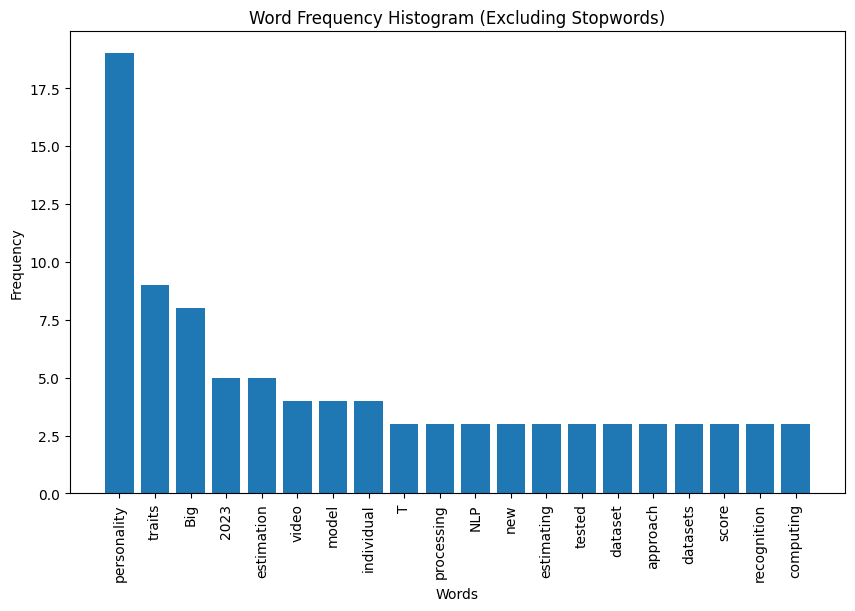

+--------------------------------------------+--------------------------------+
|                  Persons                   |         Organizations          |
+--------------------------------------------+--------------------------------+
|               Yazid Bounaba                |         Elsevier Ltd.          |
|                   Mourad                   |         ScienceDirect          |
|                Nabil Arhaba                |              CMVS              |
|              Salah Bekhoucheb              |          bUniversity           |
|                  Roberts                   |       the Basque Country       |
|                   Caspi                    |              NLP               |
|            Yazid.Bounab@oulu.fi            |              NLP               |
|                 Y. Bounab                  |              NLP               |
|          Mourad.Oussalah@oulu.fi           |           ChatLearn            |
|            Nabil.Arhab@oulu.fi        

In [ ]:
# Load the English small model into the 'nlp' object.
nlp = spacy.load("en_core_web_sm")

# Define a function to extract text from a PDF file.
def extract_text_from_pdf(pdf_path):
    """Extracts text from a PDF file.

    Args:
        pdf_path: The path to the PDF file.

    Returns:
        A string containing the extracted text.
    """

    # Open the PDF file in binary read mode.
    with open(pdf_path, 'rb') as file:
        # Create a PyPDF2 PdfReader object from the file.
        reader = PyPDF2.PdfReader(file)

        # Initialize the extracted text.
        text = ""

        # Iterate over the pages in the PDF file.
        for page in reader.pages:
            text += page.extract_text()

    # Return the extracted text.
    return text

def word_histogram_without_stopwords(text):
    """Generates a word frequency histogram for the given text, excluding stopwords.

    Args:
        text: The text to generate the histogram for.

    Returns:
        None.
    """

    # Process the text using the spaCy NLP pipeline.
    doc = nlp(text)

    # Filter out stopwords and punctuation, then count word frequencies.
    words = [token.text for token in doc if not token.is_stop and not token.is_punct and not token.text.isspace()]

    word_freq = Counter(words)

    # Plot the histogram.
    # Create a figure with a size of 10 inches by 6 inches.
    plt.figure(figsize=(10, 6))

    # Get the top 20 most common words and their frequencies.
    most_common_words = word_freq.most_common(20)

    # Create a table with PrettyTable
    table = PrettyTable(["Word", "Frequency"])

    # Add the most common words and their frequencies to the table
    for word, freq in most_common_words:
        table.add_row([word, freq])

    # Print the table
    print(table)



    # Unpack the word and count tuples.
    words, counts = zip(*most_common_words)
    # Plot a bar chart of the top 20 most common words.
    plt.bar(words, counts)
    # Rotate the x-axis labels by 45 degrees to prevent overlapping.
    plt.xticks(rotation=90)

    # Add labels to the x- and y-axes.
    plt.xlabel("Words")
    plt.ylabel("Frequency")

    # Add a title to the plot & display the plot.
    plt.title("Word Frequency Histogram (Excluding Stopwords)")
    plt.show()


    # Identify and print person and organization named entities.
    persons = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
    organizations = [ent.text for ent in doc.ents if ent.label_ == "ORG"]

    # Create a table
    table = PrettyTable(['Persons', 'Organizations'])

    # Find the maximum length between the two lists
    max_len = max(len(persons), len(organizations))

    # Loop through the lists and add rows to the table
    for i in range(max_len):
        person = persons[i] if i < len(persons) else ''
        organization = organizations[i] if i < len(organizations) else ''
        table.add_row([person, organization])

    print(table)

if __name__ == "__main__":
    """Generates a word frequency histogram for the question-2.pdf file, excluding stopwords.

    Prints the top 20 most common words and the person and organization named entities in the document.
    """

    # Get the path to the PDF file.
    pdf_path = "/content/task-02/paper.pdf"

    # Extract the text from the PDF file.
    text = extract_text_from_pdf(pdf_path)

    # Create a word histogram without stopwords for the extracted text.
    word_histogram_without_stopwords(text)


# **Task 03** - Document Summarization Using TF-IDF and POS Weights in spaCy

In [ ]:
# Initialize the spaCy pipeline
# spaCy is a natural language processing (NLP) library that can be used for tasks such as tokenization, lemmatization, and part-of-speech tagging.
nlp = spacy.load("en_core_web_md")
# The `en_core_web_sm` model is a small English language model from spaCy.

def ts3_preprocess_and_tokenize(doc):
    """Preprocess and tokenize a document with spaCy.

    Args:
        doc: The document to preprocess and tokenize.

    Returns:
        A list of lemmatized sentences.
    """

    # Process the document with spaCy.
    processed_doc = nlp(doc)

    # Lemmatize the sentences.
    lemmatized_sentences = [" ".join([token.lemma_ for token in sent if not token.is_stop and not token.is_punct]) for sent in processed_doc.sents]

    return lemmatized_sentences

def ts3compute_tfidf(sentences):
    """Compute the TF-IDF matrix for a list of sentences.

    Args:
        sentences: A list of sentences.

    Returns:
        A TF-IDF matrix and a list of feature names.
    """

    # Create a TfidfVectorizer object.
    vectorizer = TfidfVectorizer()

    # Fit the vectorizer to the sentences.
    vectorizer.fit(sentences)

    # Transform the sentences into a TF-IDF matrix.
    tfidf_matrix = vectorizer.transform(sentences)

    # Get the feature names from the vectorizer.
    feature_names = vectorizer.get_feature_names_out()

    return tfidf_matrix, feature_names


def ts3_named_entity_tfidf(sentences):
    """Computes the TF-IDF of named entities in a list of sentences.

    Args:
        sentences: A list of strings, each representing a sentence.

    Returns:
        A TF-IDF matrix, where each row represents a sentence and each column
        represents a named entity.
    """

    # Create a list of named entities from the sentences.
    named_entities = []
    for sent in sentences:
        # Parse the sentence using the spaCy NLP library.
        doc = nlp(sent)
        # Extract the named entities from the sentence that are either people or organizations.
        entities = [ent.text for ent in doc.ents if ent.label_ in ["PERSON", "ORG"]]
        # Join the named entities into a single string, separated by spaces.
        named_entities.append(" ".join(entities))

    # Create a TF-IDF vectorizer.
    vectorizer = TfidfVectorizer()
    # Fit the vectorizer to the named entities.
    vectorizer.fit(named_entities)
    # Transform the named entities into a TF-IDF matrix.
    tfidf_matrix = vectorizer.transform(named_entities)

    # Return the TF-IDF matrix.
    return tfidf_matrix



def ts3_calculate_sentence_weights(sentences, tfidf_word_matrix, tfidf_ne_matrix, tfidf_features, poss_weights):
    """Calculates the weights of a list of sentences based on their TF-IDF scores and POS tags.

    Args:
        sentences: A list of strings, each representing a sentence.
        tfidf_word_matrix: A TF-IDF matrix, where each row represents a sentence and each column
            represents a word.
        tfidf_ne_matrix: A TF-IDF matrix, where each row represents a sentence and each column
            represents a named entity.
        tfidf_features: A list of strings, representing the TF-IDF features that will be used to calculate the sentence weights.
        poss_weights: A list of floats, representing the POS tag weights that will be used to calculate the sentence weights.

    Returns:
        A list of floats, representing the weights of the sentences.
    """

    weights = []
    for i, sent in enumerate(sentences):
        doc = nlp(sent)

        # Calculate the sum of the TF-IDF scores of the TF-IDF features in the sentence.
        word_tfidf_sum = sum([tfidf_word_matrix[i, tfidf_features.tolist().index(token.lemma_)] for token in doc if token.lemma_ in tfidf_features])

        # Calculate the sum of the TF-IDF scores of the named entities in the sentence.
        ne_tfidf_sum = tfidf_ne_matrix[i].sum()

        # Calculate the sentence weight.
        weight = word_tfidf_sum + 2 * ne_tfidf_sum + poss_weights[i]
        weights.append(weight)
    return weights

def ts3_ts8_summarize(doc, poss_weights):
    """Summarizes a document using TF-IDF and POS tag weights.

    Args:
        doc: A string representing the document to be summarized.
        poss_weights: A list of floats, representing the POS tag weights that will be used to calculate the sentence weights.

    Returns:
        A string representing the summary of the document.
    """

    # Preprocess and tokenize the document.
    sentences = ts3_preprocess_and_tokenize(doc)

    # Compute the TF-IDF matrix for the words and named entities in the document.
    tfidf_word_matrix, tfidf_features = ts3compute_tfidf(sentences)
    tfidf_ne_matrix = ts3_named_entity_tfidf(sentences)

    # Calculate the weights of the sentences based on their TF-IDF scores and POS tags.
    s_weights = ts3_calculate_sentence_weights(sentences, tfidf_word_matrix, tfidf_ne_matrix, tfidf_features, poss_weights)

    # Get the top 10 sentences along with their weights.
    sorted_indices = sorted(range(len(s_weights)), key=lambda k: s_weights[k], reverse=True)
    ### top_sentences_with_weights = [f"• {sentences[i]} (Weight: {s_weights[i]:.2f})" for i in sorted_indices[:10]]
    top_sentences_with_weights = [sentences[i] for i in sorted_indices[:10]]


    # Return the summary of the document, which is the top 10 sentences joined by newline characters.
    return " ".join(top_sentences_with_weights)

def ts3_summarize(doc, poss_weights):
    """Summarizes a document using TF-IDF and POS tag weights.

    Args:
        doc: A string representing the document to be summarized.
        poss_weights: A list of floats, representing the POS tag weights that will be used to calculate the sentence weights.

    Returns:
        A string representing the summary of the document.
    """

    # Preprocess and tokenize the document.
    sentences = ts3_preprocess_and_tokenize(doc)

    # Compute the TF-IDF matrix for the words and named entities in the document.
    tfidf_word_matrix, tfidf_features = ts3compute_tfidf(sentences)
    tfidf_ne_matrix = ts3_named_entity_tfidf(sentences)

    # Calculate the weights of the sentences based on their TF-IDF scores and POS tags.
    s_weights = ts3_calculate_sentence_weights(sentences, tfidf_word_matrix, tfidf_ne_matrix, tfidf_features, poss_weights)

    # Get the top 10 sentences along with their weights.
    sorted_indices = sorted(range(len(s_weights)), key=lambda k: s_weights[k], reverse=True)
    top_sentences_with_weights = [f"{sentences[i]} (Weight: {s_weights[i]:.2f})" for i in sorted_indices[:10]]


    # Create a table with headers "Sentence" and "Weight"
    table = PrettyTable(["Sentence", "Weight"])
    table.max_width['Sentence'] = 150  # Set this to your desired width
    # Left-align the 'Summary' column
    table.align['Sentence'] = 'l'
    # Add horizontal rules between every row
    table.hrules = ALL

    # Iterate through the sentences and their weights, and add them to the table
    for sentence_with_weight in top_sentences_with_weights:
        # Split the sentence and weight based on the " (Weight:" delimiter
        sentence, weight = sentence_with_weight.split(" (Weight: ")
        weight = weight.rstrip(")")  # Remove the closing parenthesis from the weight
        table.add_row([sentence, weight])

    # Print the table
    print(table)


    # Return the summary of the document, which is the top 10 sentences joined by newline characters.
    return "\n".join(top_sentences_with_weights)





if __name__ == "__main__":
    doc = """
In the current scenario, it is necessary to understand blockchain and its value for the effective implementation of Industry 4.0. Some fields have prospective advantages for blockchain, like financial transactions applications in which blockchains can provide trust. Foreign currencies and fiat currency problems are excluded, and a controlled supply transaction may take place. The product itself and its assembly's identification part can also be linked to other areas of Blockchain in Industry 4.0. It provides a reminder where the ability to recognise goods with the defect may be beneficial. Here, blockchain will protect all the details about a product: its sub-assemblies, parts, sales paths, etc. It reduces the expense and interruption of retrieval at any time in the supply chain. New data have been gathered by cameras and sensors that could be used to construct the Blockchains network. It gives us access to more knowledge than a person would gather in a short period [[1], [2], [3]]. In order to maintain end-user support, there must also be a corresponding structural transition within an organisation. Blockchain is one of the most influential technical breakthroughs in various fields [[4], [5]]. This technology is developed remarkably in recent years and provides many applications in manufacturing [6,7]. It is used closely along with terms such as intelligent factories and Industry 4.0. Blockchain refers to a decentralised, encrypted, distributed ledger for filing computers that allow tamper-proof, real-time logs to be created. In Industry 4.0, several elements are still not well described and not fully understood. This new technology will ensure that the future effects of intelligent manufacturing solutions are amplified. The early sales experiences and the current deployments have been learned a great deal. It provides an inclusive distribution strategy, implementing and incorporating these emerging innovations being promoted and supported as resources to meet broader business goals. It could help SMEs (small and medium enterprises), in particular, to defend their inventions since blockchain may make the patent environment more straightforward, transparent and less intermediary. This would encourage competition between companies which has more difficulty in accessing the world of patents. It will allow individuals to generate green energy from a freely negotiated arrangement [[8], [9], [10]]. This technology is exceptional and avoids transactions intermediaries, potentially providing an efficient and cost-effective flow of goods and services. This record is connected to the previous block and cannot be changed or altered in the future. An open, participatory space where anyone can read and write transactions, known as non-authorised, is a decentralised forum. In comparison, blockchain is built for particular users with the advantage of reading and writing to an enclosed network. It is the main difference in the position of consumers and incentives to interact with the system among a private and a public blockchain. The supply chain is a dynamic structure comprising multiple businesses that work together to satisfy customers' needs by adding value from the raw material level to the final product. The main chain is supported by the secondary and tertiary chains that co-operate to form an ecosystem, the supplies chain network [11,12]. Transactions and information transactions also create the complexity of the chain are required to balance. It is essential to believe that blockchain provides continuity and traceability across the supply chain. This paper aims to study the significant potential role of Blockchain for Industry 4.0. This article addresses the following research questions: RQ1: To study major benefits of blockchain in the context of Industry 4.0; RQ2: To identify and study major drivers & enablers of Blockchain technology for industry 4.0; RQ3: To study associated blockchain capabilities for successful Industry 4.0 implementation perspectives; RQ4: To study different Industry 4.0 spheres/sub-domains for Blockchain technology realisation; RQ5: To identify and study major applications of Blockchain technology for Industry 4.0. 1.1. Need for the study In Industry 4.0 environment, real-time information is needed to create a smooth manufacturing and service system. The limiting factor is processing time, so proper consideration for real-world applications is needed. To maintain record and information, blockchain is the perfect technology which can fulfil major challenges. So, the need of this study is to identify the potential role of Blockchain in Industry 4.0. In business, it is time for blockchain replenishment to increase transaction efficiency. Blockchain-empowered sustainable manufacturing in the industries helps for product lifecycle management in Industry 4.0. This technology-enhanced smart factory and has the potential to serve information security [8,13]. In manufacturing environments where risks are lesser, this will flourish and provide a better safety level to processes. However, substantial work must be performed with the platform before the organisations accept blockchain for implementation. The risk level can be minimised, and since the technology is continuously evolving, organisational executives must recognise the beneficial impact of this technology on their enterprise. Industry 4.0 involves an improved degree of faith and privacy. Some blockchain studies related to Industry 4.0 are also available but they are focusing on the specific aspect of the industry 4.0. For instance, Leng et al. [14] have conducted a review to discuss how blockchain can overcome potential cybersecurity barriers to achieving intelligence in Industry 4.0. In this study we have focused on various drivers, enablers, and associated capabilities of Blockchain technology for Industry 4.0 that are holistic in nature. Here blockchain comes in to satisfy the industry-specific requirements of Industry 4.0 [15,16]. 1.2. Blockchain Blockchain can be defined as a decentralised, distributed directory driving smart contracts and providing the opportunity to traceability aid, record management, automation for the supply chain, payment applications and other business transactions. Blockchain provides a record of almost real-time replicated between a network of business partners and is unchanging. The process takes information that would have previously been stored in the Enterprise Resource Planning (ERP) of the company. It now makes it available in a distributed network of records across disparate companies. Several benefits of blockchain enable organisations to better understand their customers, particularly on the demand side. Data analytics and Artificial Intelligence (AI) have well-understood cases of application. It can also reach a glass ceiling when it comes to technological viability, but several businesses strive for convenience. It improves the protection and efficiency of procedures and requires more stamina and resilience than accelerated financial consequences [17,18]. In technology circles, the blockchain is used as a permanent distributed directory to record all value transactions. The organisation has total ownership of the blockchain, other than the nodes that make it superior to other data storage technologies. Each node participating in the transaction would have access to the ledger from multiple devices. This enables decentralisation and network-wide autonomy to build trust and confidence in the transaction ecosystem. Participants initially review all transactions connected to the blockchain. Blockchain technology, sometimes known as distributed ledger technology, is a relatively new form of a database for transaction information stored in a decentralised and transparent manner. The database is run by a network of computers called nodes, so there is no single-point-of-failure, and information can be accessed in real-time. The industry is correctly in line with the concept of the influence on the market of blockchain technologies [12,19,20]. It allows users to preserve their exclusive and unchanging identity documents without their permission that nobody can read or view.
"""

    # Create a list of POS tag weights, each initialized to 0.
    poss_weights = [0 for _ in ts3_preprocess_and_tokenize(doc)]

    # Print the summary of the document using the given POS tag weights.
    ts3_summarize(doc, poss_weights)
    # print(ts3_summarize(doc, poss_weights))



+--------------------------------------------------------------------------------------------------------------------------------------------------------+--------+
| Sentence                                                                                                                                               | Weight |
+--------------------------------------------------------------------------------------------------------------------------------------------------------+--------+
| article address follow research question RQ1 study major benefit blockchain context industry 4.0 RQ2 identify study major driver enabler Blockchain    |  9.29  |
| technology industry 4.0 RQ3 study associate blockchain capability successful industry 4.0 implementation perspective RQ4 study different industry 4.0  |        |
| sphere sub domain Blockchain technology realisation rq5 identify study major application Blockchain technology industry 4.0                            |        |
+---------------

# **Task 04** - Automated Text Summarization and Evaluation with spaCy and ROUGE Metrics

In [ ]:
# Initialize the spaCy pipeline
nlp = spacy.load("en_core_web_md")

def preprocess_and_tokenize(doc):
    """Preprocess and tokenize a document using spaCy.

    Args:
        doc: A string containing the document to be processed.

    Returns:
        A list of strings, where each string is a lemmatized sentence.
    """

    # Process the document using spaCy.
    processed_doc = nlp(doc)

    # Lemmatize the sentences.
    lemmatized_sentences = [" ".join([token.lemma_ for token in sent if not token.is_stop and not token.is_punct]) for sent in processed_doc.sents]

    return lemmatized_sentences

def compute_tfidf(sentences):
    """Compute the TF-IDF matrix for a list of sentences.

    Args:
        sentences: A list of strings, where each string is a sentence.

    Returns:
        A tuple of two NumPy arrays:
            * The TF-IDF matrix, which is a 2D array where each row represents a sentence and each column represents a word.
            * The list of feature names, which is a 1D array where each element is the name of a word in the vocabulary.
    """
    # Create a TfidfVectorizer object.
    vectorizer = TfidfVectorizer()
    # Fit the TfidfVectorizer object to the sentences.
    # Transform the sentences into a TF-IDF matrix.
    tfidf_matrix = vectorizer.fit_transform(sentences)

    return tfidf_matrix, vectorizer.get_feature_names_out()

def named_entity_tfidf(sentences):
    """
    Given a list of sentences, this function calculates the TF-IDF score for named entities (specifically, PERSON and ORG).

    Parameters:
    - sentences: A list of text sentences.

    Returns:
    - tfidf_matrix: A matrix of TF-IDF scores for named entities found in the sentences.
    """

    # Initialize an empty list to store named entities for each sentence
    named_entities = []

    # Iterate through each sentence to extract named entities
    for sent in sentences:
        # Parse the sentence using a predefined NLP model (e.g., spaCy)
        doc = nlp(sent)
        # Extract named entities that are either PERSON or ORG from the parsed sentence
        entities = [ent.text for ent in doc.ents if ent.label_ in ["PERSON", "ORG"]]
        # Append the extracted entities to our list, joining them as a single string
        named_entities.append(" ".join(entities))

    # Initialize the TF-IDF vectorizer
    vectorizer = TfidfVectorizer()

    # Apply the vectorizer on the extracted named entities to get the TF-IDF matrix
    tfidf_matrix = vectorizer.fit_transform(named_entities)

    return tfidf_matrix


def calculate_sentence_weights(sentences, tfidf_word_matrix, tfidf_ne_matrix, tfidf_features, poss_weights):
    """
    Calculate the weight of each sentence based on a combination of word TF-IDF scores, named entity TF-IDF scores,
    and part-of-speech tag weights.

    Parameters:
    - sentences: A list of text sentences.
    - tfidf_word_matrix: A matrix of TF-IDF scores for words in the sentences.
    - tfidf_ne_matrix: A matrix of TF-IDF scores for named entities in the sentences.
    - tfidf_features: A list of features (words) in the TF-IDF model's vocabulary.
    - poss_weights: A list of part-of-speech tag weights for the sentences.

    Returns:
    - weights: A list of calculated weights for each sentence.
    """

    # Initialize an empty list to store the weight of each sentence
    weights = []

    # Iterate through each sentence to calculate its weight
    for i, sent in enumerate(sentences):
        # Parse the sentence using a predefined NLP model (e.g., spaCy)
        doc = nlp(sent)
        # Calculate the sum of TF-IDF scores of words in the sentence
        word_tfidf_sum = sum([tfidf_word_matrix[i, tfidf_features.tolist().index(token.lemma_)]
                              for token in doc if token.lemma_ in tfidf_features])

        # Calculate the sum of TF-IDF scores for named entities in the sentence
        ne_tfidf_sum = tfidf_ne_matrix[i].sum()
        # Combine the two sums and add the part-of-speech weight to get the final sentence weight
        # Here, named entity TF-IDF scores are given twice the importance of word TF-IDF scores
        weight = word_tfidf_sum + 2 * ne_tfidf_sum + poss_weights[i]
        # Append the calculated weight to our list
        weights.append(weight)

    return weights


def summarize(doc, poss_weights):
    """
    Generate a summary for the given document based on TF-IDF scores of words,
    named entity recognition, and part-of-speech tag weights.

    Parameters:
    - doc: A string containing the document to be summarized.
    - poss_weights: A list of part-of-speech tag weights for the sentences in the document.

    Returns:
    - A string containing the summary of the document.
    """

    # Preprocess the document and tokenize it into sentences
    sentences = preprocess_and_tokenize(doc)

    # Compute the TF-IDF matrix and the list of features (words) for the sentences
    tfidf_word_matrix, tfidf_features = compute_tfidf(sentences)

    # Compute the TF-IDF matrix for named entities within the sentences
    tfidf_ne_matrix = named_entity_tfidf(sentences)

    # Calculate the weight for each sentence in the document
    s_weights = calculate_sentence_weights(sentences, tfidf_word_matrix, tfidf_ne_matrix, tfidf_features, poss_weights)

    # Sort the sentences by their calculated weights in descending order
    # and pick the top 10 sentences to include in the summary
    sorted_indices = sorted(range(len(s_weights)), key=lambda k: s_weights[k], reverse=True)
    top_sentences_with_weights = [sentences[i] for i in sorted_indices[:10]]


    # Process the summary: remove newlines, carriage returns, and extra spaces
    processed_summary = re.sub(' +', ' ', " ".join(top_sentences_with_weights).replace('\n', ' ').replace('\r', '')).strip()

    # Create a table
    table = PrettyTable(['Summary'])

    # Set the max width for the 'Summary' column
    table.max_width['Summary'] = 150  # Set this to your desired width
    # Left-align the 'Summary' column
    table.align['Summary'] = 'l'

    # Add the processed summary to the table's cell
    table.add_row([processed_summary])

    # Print the table
    print(table)
    print()

    return processed_summary





def ts4_evaluate_summary(generated_summary, reference_summary):
    """
    Evaluate the generated summary against a reference summary using ROUGE metrics.

    Parameters:
    - generated_summary: A string containing the summary generated by a model or algorithm.
    - reference_summary: A string containing the reference summary (e.g., a human-written summary).

    Returns:
    - A dictionary containing the average ROUGE-1, ROUGE-2, and ROUGE-L scores.
    """

    # Initialize the ROUGE scoring object
    rouge = Rouge()

    # Compute the ROUGE scores for the generated summary against the reference summary
    scores = rouge.get_scores(generated_summary, reference_summary, avg=True)

    return scores


def read_text_from_file(file_path):
    """
    Read and return the content of a text file.

    Parameters:
    - file_path: A string specifying the path to the text file.

    Returns:
    - A string containing the content of the text file.
    """

    # Open the file with read mode and UTF-8 encoding
    with open(file_path, 'r', encoding='utf-8') as file:
        # Read the entire content of the file
        return file.read()


if __name__ == "__main__":
    """
    The main driver code to execute the summarization process.
    """

    # Assume 'doc' is the document we want to summarize.
    # Here, we're reading the content of the file 'accuracy_garmin_nuvi_255W_gps.txt.data' into the variable 'doc'.
    doc = read_text_from_file('/content/accuracy_garmin_nuvi_255W_gps/accuracy_garmin_nuvi_255W_gps.txt.data')

    # TODO: Assign appropriate POSS (Positional Sentence Scores) weights based on the sentence's location in the document.
    # For now, we initialize these weights as zeros for every sentence in the document.
    poss_weights = [0 for _ in preprocess_and_tokenize(doc)]

    # Generate a summary for the document based on the given POSS weights.
    generated_summary = summarize(doc, poss_weights)

    # Read the reference (or "gold standard") summary from a file.
    gold_summary_1 = read_text_from_file('/content/accuracy_garmin_nuvi_255W_gps/accuracy_garmin_nuvi_255W_gps.1.gold')

    # Evaluate the generated summary against the gold standard using Rouge metrics.
    rouge_scores_1 = ts4_evaluate_summary(generated_summary, gold_summary_1)

    # Print the generated summary and its Rouge scores.
    print("gold_summary_1:\n", "-"*15)

    print("Rouge-1:", rouge_scores_1['rouge-1'])  # Rouge-1 score
    print("Rouge-2:", rouge_scores_1['rouge-2'])  # Rouge-2 score
    print("Rouge-l:", rouge_scores_1['rouge-l'])  # Rouge-L (Longest Common Subsequence) score
    print()
    # Check if Rouge-3 score exists in the scores, and print it. Otherwise, indicate that the score is not available.
    # print("Rouge-3:", rouge_scores.get('rouge-3', "Score not available"))
    # Print all the Rouge scores in a nicely formatted JSON style.
    # print("rouge_scores", json.dumps(rouge_scores, indent=4))


    gold_summary_2 = read_text_from_file('/content/accuracy_garmin_nuvi_255W_gps/accuracy_garmin_nuvi_255W_gps.2.gold')
    rouge_scores_2 = ts4_evaluate_summary(generated_summary, gold_summary_2)
    print("gold_summary_2:\n", "-"*15)
    print("Rouge-1:", rouge_scores_2['rouge-1'])  # Rouge-1 score
    print("Rouge-2:", rouge_scores_2['rouge-2'])  # Rouge-2 score
    print("Rouge-l:", rouge_scores_2['rouge-l'])  # Rouge-L (Longest Common Subsequence) score
    print()

    gold_summary_3 = read_text_from_file('/content/accuracy_garmin_nuvi_255W_gps/accuracy_garmin_nuvi_255W_gps.3.gold')
    rouge_scores_3 = ts4_evaluate_summary(generated_summary, gold_summary_3)
    print("gold_summary_3:\n", "-"*15)
    print("Rouge-1:", rouge_scores_3['rouge-1'])  # Rouge-1 score
    print("Rouge-2:", rouge_scores_3['rouge-2'])  # Rouge-2 score
    print("Rouge-l:", rouge_scores_3['rouge-l'])  # Rouge-L (Longest Common Subsequence) score
    print()

    gold_summary_4 = read_text_from_file('/content/accuracy_garmin_nuvi_255W_gps/accuracy_garmin_nuvi_255W_gps.4.gold')
    rouge_scores_4 = ts4_evaluate_summary(generated_summary, gold_summary_4)
    print("gold_summary_4:\n", "-"*15)
    print("Rouge-1:", rouge_scores_4['rouge-1'])  # Rouge-1 score
    print("Rouge-2:", rouge_scores_4['rouge-2'])  # Rouge-2 score
    print("Rouge-l:", rouge_scores_4['rouge-l'])  # Rouge-L (Longest Common Subsequence) score
    print()

    gold_summary_5 = read_text_from_file('/content/accuracy_garmin_nuvi_255W_gps/accuracy_garmin_nuvi_255W_gps.5.gold')
    rouge_scores_5 = ts4_evaluate_summary(generated_summary, gold_summary_5)
    print("gold_summary_5:\n", "-"*15)
    print("Rouge-1:", rouge_scores_5['rouge-1'])  # Rouge-1 score
    print("Rouge-2:", rouge_scores_5['rouge-2'])  # Rouge-2 score
    print("Rouge-l:", rouge_scores_5['rouge-l'])  # Rouge-L (Longest Common Subsequence) score
    print()




+--------------------------------------------------------------------------------------------------------------------------------------------------------+
| Summary                                                                                                                                                |
+--------------------------------------------------------------------------------------------------------------------------------------------------------+
| new Garmin 255w easy Set Accurate Directions location User Friendly Unit vehicle try function accurate leave battery mode stop Cracker Barrell lunch   |
| play trangle game tee Garmin load accurate map generally know road remotest area 0 5 star GPS Navigator navigate accurately straight road find Garmin  |
| software provide accurate direction whereever intend little disappointed inaccuracy post speed limit guilty pay close attention sign especially w      |
| interstate speed trap constantly change find map inaccurate update G

# **Task 05** - Advanced Text Summarization with TF-IDF, Named Entity Recognition, and Semantic Similarity

In [ ]:
# Initialize the spaCy pipeline
nlp = spacy.load("en_core_web_md")

def ts5_preprocess_and_tokenize(doc):
    """
    This function takes a document (text) as input and returns a list of lemmatized sentences
    after removing stopwords and punctuation.

    Parameters:
    - doc (str): The input document string.

    Returns:
    - list of str: List of lemmatized sentences.
    """

    # Process the document using the spaCy NLP pipeline.
    processed_doc = nlp(doc)

    # Iterate over each sentence in the processed document.
    # For each sentence, iterate over its tokens and:
    #   1. Check if the token is not a stop word and not a punctuation mark.
    #   2. If the token passes the above checks, take its lemma (base form).
    # Join these lemmatized tokens to form the lemmatized sentence.
    # The result is a list of lemmatized sentences.
    lemmatized_sentences = [" ".join([token.lemma_ for token in sent if not token.is_stop and not token.is_punct]) for sent in processed_doc.sents]

    return lemmatized_sentences


def ts5_compute_tfidf(sentences):
    """
    Compute the TF-IDF matrix for the given sentences and also return the feature names (words)
    for which the TF-IDF values are computed.

    Parameters:
    - sentences (list of str): List of sentences for which to compute TF-IDF values.

    Returns:
    - tfidf_matrix (sparse matrix): The computed TF-IDF values for each sentence and word combination.
    - list of str: Feature names (words) corresponding to the columns of the TF-IDF matrix.
    """

    # Initialize a TF-IDF vectorizer.
    vectorizer = TfidfVectorizer()

    # Fit the vectorizer to the provided sentences and transform the sentences to
    # get their corresponding TF-IDF values. The result is stored in a matrix where
    # each row corresponds to a sentence and each column corresponds to a unique word.
    tfidf_matrix = vectorizer.fit_transform(sentences)

    # Get the list of unique words (features) for which the TF-IDF values are computed.
    # This list will match the order of columns in the TF-IDF matrix.
    feature_names = vectorizer.get_feature_names_out()

    return tfidf_matrix, feature_names


def ts5_named_entity_tfidf(sentences):
    """
    Compute the TF-IDF matrix for named entities (specifically PERSON and ORG) present in the given sentences.

    Parameters:
    - sentences (list of str): List of sentences for which to compute TF-IDF values of named entities.

    Returns:
    - tfidf_matrix (sparse matrix): The computed TF-IDF values for each sentence and named entity combination.
    """

    # List to store concatenated named entities for each sentence.
    named_entities = []

    # Loop through each sentence.
    for sent in sentences:
        # Parse the sentence using spaCy.
        doc = nlp(sent)

        # Extract named entities that are labeled as PERSON or ORG.
        entities = [ent.text for ent in doc.ents if ent.label_ in ["PERSON", "ORG"]]

        # Join the extracted named entities into a single string and append to the named_entities list.
        named_entities.append(" ".join(entities))

    # Initialize a TF-IDF vectorizer.
    vectorizer = TfidfVectorizer()

    # Fit the vectorizer to the named_entities list and transform the list to
    # get their corresponding TF-IDF values. The result is stored in a matrix where
    # each row corresponds to a sentence and each column corresponds to a unique named entity.
    tfidf_matrix = vectorizer.fit_transform(named_entities)

    return tfidf_matrix


def ts5_calculate_sentence_weights(sentences, tfidf_word_matrix, tfidf_ne_matrix, tfidf_features, poss_weights):
    """
    Calculate the weight for each sentence based on its TF-IDF values, named entity TF-IDF values, and position-based score.

    Parameters:
    - sentences (list of str): List of sentences for which weights are to be calculated.
    - tfidf_word_matrix (sparse matrix): TF-IDF matrix of the words in the sentences.
    - tfidf_ne_matrix (sparse matrix): TF-IDF matrix of the named entities in the sentences.
    - tfidf_features (list of str): List of features (words) in the TF-IDF matrix.
    - poss_weights (list of float): Position-based score for each sentence.

    Returns:
    - weights (list of float): Weight for each sentence.
    """

    # List to store the weight of each sentence.
    weights = []

    # Loop through each sentence and its index.
    for i, sent in enumerate(sentences):

        # Parse the sentence using spaCy.
        doc = nlp(sent)

        # Calculate the sum of TF-IDF values of words in the sentence.
        word_tfidf_sum = sum([tfidf_word_matrix[i, tfidf_features.tolist().index(token.lemma_)] for token in doc if token.lemma_ in tfidf_features])

        # Calculate the sum of TF-IDF values of named entities in the sentence.
        ne_tfidf_sum = tfidf_ne_matrix[i].sum()

        # Calculate the overall weight of the sentence. It's the sum of word TF-IDF,
        # twice the named entity TF-IDF, and the position-based score (poss_weights).
        weight = word_tfidf_sum + 2 * ne_tfidf_sum + poss_weights[i]

        # Append the weight to the weights list.
        weights.append(weight)

    return weights


def ts5_summarize(doc, poss_weights):
    """
    Generate a summary of the provided document based on TF-IDF values, named entity TF-IDF values, and position-based scores.

    Parameters:
    - doc (str): The document to be summarized.
    - poss_weights (list of float): Position-based score for each sentence in the document.

    Returns:
    - str: Summary consisting of the top 10 sentences based on their weights.
    """

    # Preprocess the document and tokenize into sentences.
    sentences = ts5_preprocess_and_tokenize(doc)

    # Compute the TF-IDF matrix for words in the sentences.
    tfidf_word_matrix, tfidf_features = ts5_compute_tfidf(sentences)

    # Compute the TF-IDF matrix for named entities in the sentences.
    tfidf_ne_matrix = named_entity_tfidf(sentences)

    # Calculate the weight for each sentence based on its TF-IDF values, named entity TF-IDF values, and position-based score.
    s_weights = calculate_sentence_weights(sentences, tfidf_word_matrix, tfidf_ne_matrix, tfidf_features, poss_weights)

    # Sort the sentences based on their weights in descending order and select the top 10.
    sorted_indices = sorted(range(len(s_weights)), key=lambda k: s_weights[k], reverse=True)
    top_sentences_with_weights = [sentences[i] for i in sorted_indices[:10]]

    # Join the top sentences to form the summary and return it.
    return " ".join(top_sentences_with_weights)




def ts5_read_text_from_file(file_path):
    """
    Reads the content of a text file and returns it as a string.

    Parameters:
    - file_path (str): The path to the text file.

    Returns:
    - str: Content of the text file.
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()


def ts5_semantic_similarity(sent1, sent2):
    """
    Compute the semantic similarity between two sentences using the spaCy's similarity measure.

    Parameters:
    - sent1 (str): The first sentence.
    - sent2 (str): The second sentence.

    Returns:
    - float: Semantic similarity score between sent1 and sent2.
    """

    # Tokenize and process the sentences using spaCy.
    doc1 = nlp(sent1)
    doc2 = nlp(sent2)

    # Return the computed similarity score between the two sentences.
    return doc1.similarity(doc2)

def ts5_ts8_diversity_enhanced_summary(doc, poss_weights):
    """
    Produce a diversity-enhanced summary for the given document.
    This function first extracts the top 20 sentences based on calculated weights and
    then selects 10 out of them which are most diverse in terms of semantic similarity.

    Parameters:
    - doc (str): The document to be summarized.
    - poss_weights (list of float): Positional weights for sentences in the document.

    Returns:
    - str: A diversity-enhanced summary containing 10 sentences.
    """

    # Preprocess the document to get tokenized and lemmatized sentences.
    sentences = ts5_preprocess_and_tokenize(doc)

    # Compute TF-IDF matrices for the sentences and their named entities.
    tfidf_word_matrix, tfidf_features = ts5_compute_tfidf(sentences)
    tfidf_ne_matrix = ts5_named_entity_tfidf(sentences)

    # Calculate weights for each sentence.
    s_weights = ts5_calculate_sentence_weights(sentences, tfidf_word_matrix, tfidf_ne_matrix, tfidf_features, poss_weights)

    # Extract the top 20 sentences based on their computed weights.
    sorted_indices = sorted(range(len(s_weights)), key=lambda k: s_weights[k], reverse=True)[:20]
    top_sentences = [sentences[i] for i in sorted_indices]

    # Start the diversity-enhanced summarizer with the top-ranked sentence.
    summarizer = [top_sentences[0]]

    # Iterate over the next 9 sentences. At each step, select the sentence that
    # has the lowest cumulative semantic similarity to the sentences already selected.
    for _ in range(9):  # As we've already selected the top sentence, we need to select 9 more.
        min_sim_sum = float('inf')
        next_sentence = ""

        for s in top_sentences:
            if s not in summarizer:
                # Calculate the cumulative semantic similarity of the current sentence
                # with the sentences already selected.
                sim_sum = sum([ts5_semantic_similarity(s, selected_sentence) for selected_sentence in summarizer])

                # If the current sentence has a lower cumulative similarity, it becomes the candidate for the next sentence.
                if sim_sum < min_sim_sum:
                    min_sim_sum = sim_sum
                    next_sentence = s

        summarizer.append(next_sentence)

    return " ".join(summarizer)

def ts5_diversity_enhanced_summary(doc, poss_weights):
    """
    Produce a diversity-enhanced summary for the given document.
    This function first extracts the top 20 sentences based on calculated weights and
    then selects 10 out of them which are most diverse in terms of semantic similarity.

    Parameters:
    - doc (str): The document to be summarized.
    - poss_weights (list of float): Positional weights for sentences in the document.

    Returns:
    - str: A diversity-enhanced summary containing 10 sentences.
    """

    # Preprocess the document to get tokenized and lemmatized sentences.
    sentences = ts5_preprocess_and_tokenize(doc)

    # Compute TF-IDF matrices for the sentences and their named entities.
    tfidf_word_matrix, tfidf_features = ts5_compute_tfidf(sentences)
    tfidf_ne_matrix = ts5_named_entity_tfidf(sentences)

    # Calculate weights for each sentence.
    s_weights = ts5_calculate_sentence_weights(sentences, tfidf_word_matrix, tfidf_ne_matrix, tfidf_features, poss_weights)

    # Extract the top 20 sentences based on their computed weights.
    sorted_indices = sorted(range(len(s_weights)), key=lambda k: s_weights[k], reverse=True)[:20]
    top_sentences = [sentences[i] for i in sorted_indices]

    # Start the diversity-enhanced summarizer with the top-ranked sentence.
    summarizer = [top_sentences[0]]

    # Iterate over the next 9 sentences. At each step, select the sentence that
    # has the lowest cumulative semantic similarity to the sentences already selected.
    for _ in range(9):  # As we've already selected the top sentence, we need to select 9 more.
        min_sim_sum = float('inf')
        next_sentence = ""

        for s in top_sentences:
            if s not in summarizer:
                # Calculate the cumulative semantic similarity of the current sentence
                # with the sentences already selected.
                sim_sum = sum([ts5_semantic_similarity(s, selected_sentence) for selected_sentence in summarizer])

                # If the current sentence has a lower cumulative similarity, it becomes the candidate for the next sentence.
                if sim_sum < min_sim_sum:
                    min_sim_sum = sim_sum
                    next_sentence = s

        summarizer.append(next_sentence)

    processed_summary = re.sub(' +', ' ', " ".join(summarizer).replace('\n', ' ').replace('\r', '')).strip()

    # Create a table
    table = PrettyTable(['Summary'])

    # Set the max width for the 'Summary' column
    table.max_width['Summary'] = 150  # Set this to your desired width
    # Left-align the 'Summary' column
    table.align['Summary'] = 'l'

    # Add the processed summary to the table's cell
    table.add_row([processed_summary])

    # Print the table
    print(table)
    print()

    return processed_summary



if __name__ == "__main__":
    """
    Main execution point of the script.
    It demonstrates the process of generating a diversity-enhanced summary for a given document.
    """

    # NOTE: In an actual application, you'd want to load and preprocess the entire Opinosis dataset.
    # For this demonstration, we're only loading a single document and its associated gold summary.

    # Read the document content from the specified file.
    doc = ts5_read_text_from_file('/content/accuracy_garmin_nuvi_255W_gps/accuracy_garmin_nuvi_255W_gps.txt.data')

    # Create positional weights for the sentences in the document.
    # Here, all weights are initialized to zero for simplicity.
    poss_weights = [0 for _ in ts5_preprocess_and_tokenize(doc)]

    # Print the diversity-enhanced summary of the document.
    # print(ts5_diversity_enhanced_summary(doc, poss_weights))
    ts5_diversity_enhanced_summary(doc, poss_weights)




+--------------------------------------------------------------------------------------------------------------------------------------------------------+
| Summary                                                                                                                                                |
+--------------------------------------------------------------------------------------------------------------------------------------------------------+
| new Garmin 255w easy Set Accurate Directions location User Friendly Unit vehicle try accuracy yard lot friend address inaccurate GPS 0 5 star GPS      |
| Navigator navigate accurately straight road glad buy like easy read graphic voice tell street turn uncannily accurate estimate mileage time arrival    |
| destination update late 2010 map soon receive unit map accurate function accurate leave battery mode stop Cracker Barrell lunch play trangle game tee  |
| direction provide accurate far accurate small glitch find explain co

# **Task 6** - Advanced Text Summarization with TF-IDF, Named Entities, and RAKE

In [ ]:
# Initialize the spaCy pipeline
nlp = spacy.load("en_core_web_md")

def preprocess_and_tokenize(doc):
    """
    Preprocesses and tokenizes the input document.

    Args:
        doc (str): The input document text.

    Returns:
        List[str]: A list of lemmatized sentences with stopwords and punctuation removed.
    """

    # Process the document using SpaCy's language model.
    processed_doc = nlp(doc)

    # Lemmatize each sentence and remove stopwords and punctuation.
    lemmatized_sentences = [" ".join([token.lemma_ for token in sent if not token.is_stop and not token.is_punct]) for sent in processed_doc.sents]

    return lemmatized_sentences

def compute_tfidf(sentences):
    """
    Computes the TF-IDF representation for the given sentences.

    Args:
        sentences (List[str]): A list of preprocessed sentences.

    Returns:
        tuple: A tuple containing the TF-IDF matrix and the feature names.
    """

    # Initialize a TF-IDF vectorizer.
    vectorizer = TfidfVectorizer()

    # Fit and transform the sentences to produce the TF-IDF matrix.
    tfidf_matrix = vectorizer.fit_transform(sentences)

    # Return the TF-IDF matrix and the feature names.
    return tfidf_matrix, vectorizer.get_feature_names_out()


def named_entity_tfidf(sentences):
    """
    Computes the TF-IDF representation for named entities (specifically 'PERSON' and 'ORG') found in the sentences.

    Args:
        sentences (List[str]): A list of preprocessed sentences.

    Returns:
        sparse matrix: A TF-IDF matrix representing the named entities in the sentences.
    """

    # List to store named entities for each sentence.
    named_entities = []

    # Loop through each sentence to extract named entities.
    for sent in sentences:
        # Parse the sentence using SpaCy's language model.
        doc = nlp(sent)

        # Extract entities labeled as 'PERSON' or 'ORG' from the sentence.
        entities = [ent.text for ent in doc.ents if ent.label_ in ["PERSON", "ORG"]]

        # Join the extracted entities into a single string and append to the list.
        named_entities.append(" ".join(entities))

    # Initialize a TF-IDF vectorizer.
    vectorizer = TfidfVectorizer()

    # Fit and transform the list of named entities to produce the TF-IDF matrix.
    tfidf_matrix = vectorizer.fit_transform(named_entities)

    # Return the TF-IDF matrix.
    return tfidf_matrix



# Import necessary libraries
import RAKE

# Set up the RAKE object with a smart stoplist.
rake_object = RAKE.Rake(RAKE.SmartStopList())

def extract_keywords_with_rake(doc):
    """
    Extracts keywords from the document using the RAKE (Rapid Automatic Keyword Extraction) algorithm.

    Args:
        doc (str): The input document.

    Returns:
        List[Tuple[str, float]]: A list of keyword phrases along with their RAKE scores.
    """
    return rake_object.run(doc)

def calculate_sentence_weights_with_rake(sentences, tfidf_word_matrix, tfidf_ne_matrix, tfidf_features, poss_weights, rake_keywords):
    """
    Computes sentence weights by considering TF-IDF scores, named entity importance, position-based scores, and RAKE keyword importance.

    Args:
        sentences (List[str]): A list of preprocessed sentences.
        tfidf_word_matrix (sparse matrix): The TF-IDF representation of the sentences.
        tfidf_ne_matrix (sparse matrix): The TF-IDF representation of named entities in the sentences.
        tfidf_features (List[str]): List of words/features in the TF-IDF representation.
        poss_weights (List[float]): Position-based weights for each sentence.
        rake_keywords (List[Tuple[str, float]]): Keywords extracted using RAKE along with their scores.

    Returns:
        List[float]: Computed weights for each sentence.
    """
    weights = []

    for i, sent in enumerate(sentences):
        # Parse the sentence using SpaCy's language model.
        doc = nlp(sent)
        # Calculate the TF-IDF sum for the sentence.
        word_tfidf_sum = sum([tfidf_word_matrix[i, tfidf_features.tolist().index(token.lemma_)] for token in doc if token.lemma_ in tfidf_features])

        # Calculate the named entity TF-IDF sum for the sentence.
        ne_tfidf_sum = tfidf_ne_matrix[i].sum()

        # Incorporate RAKE keyword importance into the weights.
        # We count the number of RAKE keywords present in the sentence.
        rake_weight = sum([1 for keyword in rake_keywords if keyword in sent])

        # Calculate the final weight for the sentence.
        weight = word_tfidf_sum + 2 * ne_tfidf_sum + poss_weights[i] + rake_weight
        weights.append(weight)

    return weights

def rake_based_summarize(doc, poss_weights):
    """
    Summarizes a document by considering TF-IDF scores, named entity importance, position-based scores, and RAKE keyword importance.

    Args:
        doc (str): The input document.
        poss_weights (List[float]): Position-based weights for each sentence.

    Returns:
        str: A summarized version of the document, consisting of the top 10 sentences based on computed weights.
    """

    # Preprocess and tokenize the document.
    sentences = preprocess_and_tokenize(doc)

    # Compute the TF-IDF representation for the sentences.
    tfidf_word_matrix, tfidf_features = compute_tfidf(sentences)

    # Compute the TF-IDF representation for the named entities in the sentences.
    tfidf_ne_matrix = named_entity_tfidf(sentences)

    # Extract the top 10 keywords from the document using RAKE.
    rake_keywords = [word[0] for word in extract_keywords_with_rake(doc)[:10]]

    # Calculate the weights for each sentence by considering the above features.
    s_weights = calculate_sentence_weights_with_rake(sentences, tfidf_word_matrix, tfidf_ne_matrix, tfidf_features, poss_weights, rake_keywords)

    # Sort the sentences based on their weights and select the top 10.
    sorted_indices = sorted(range(len(s_weights)), key=lambda k: s_weights[k], reverse=True)
    top_sentences_with_weights = [sentences[i] for i in sorted_indices[:10]]



    # Process the summary: remove newlines, carriage returns, and extra spaces
    processed_summary = re.sub(' +', ' ', " ".join(top_sentences_with_weights).replace('\n', ' ').replace('\r', '')).strip()

    # Create a table
    table = PrettyTable(['Summary'])

    # Set the max width for the 'Summary' column
    table.max_width['Summary'] = 150  # Set this to your desired width
    # Left-align the 'Summary' column
    table.align['Summary'] = 'l'

    # Add the processed summary to the table's cell
    table.add_row([processed_summary])

    # Print the table
    print(table)
    print()

    # Join the selected sentences and return the summarized text.
    return top_sentences_with_weights



def read_text_from_file(file_path):
    """
    Reads text from a file.

    Args:
        file_path (str): The path to the file.

    Returns:
        str: The text read from the file.
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()


if __name__ == "__main__":
    """
    Main execution block. Reads the document from a file and prints its summarized version.
    """

    # Read the document from the specified file.
    doc = read_text_from_file('/content/accuracy_garmin_nuvi_255W_gps/accuracy_garmin_nuvi_255W_gps.txt.data')

    # Preprocess and tokenize the document to get the number of sentences.
    poss_weights = [0 for _ in preprocess_and_tokenize(doc)]

    # Print the summarized version of the document using the `rake_based_summarize` function.
    # print(rake_based_summarize(doc, poss_weights))
    rake_based_summarize(doc, poss_weights)




+--------------------------------------------------------------------------------------------------------------------------------------------------------+
| Summary                                                                                                                                                |
+--------------------------------------------------------------------------------------------------------------------------------------------------------+
| new Garmin 255w easy Set Accurate Directions location User Friendly Unit vehicle try function accurate leave battery mode stop Cracker Barrell lunch   |
| play trangle game tee Garmin load accurate map generally know road remotest area 0 5 star GPS Navigator navigate accurately straight road find Garmin  |
| software provide accurate direction whereever intend little disappointed inaccuracy post speed limit guilty pay close attention sign especially w      |
| interstate speed trap constantly change find map inaccurate update G

# **Task 07** - Document Summarization Using Various Sumy Algorithms

In [ ]:
# Specifies the number of sentences for the summary
SENTENCES_COUNT = 10

def summarize_with_sumy(doc_path, summarizer):
    """
    Summarizes a document using the specified Sumy summarizer.

    Args:
        doc_path (str): The path to the document file.
        summarizer (SummarizerI): The Sumy summarizer instance.

    Returns:
        str: The summarized text.
    """

    # Parse the document from the given file path
    parser = PlaintextParser.from_file(doc_path, Tokenizer("english"))

    # If the chosen summarizer is Edmundson, configure bonus, stigma, and null words
    if isinstance(summarizer, EdmundsonSummarizer):
        summarizer.bonus_words = ['important', 'key', 'major', 'significant']
        summarizer.stigma_words = ['example', 'similarly', 'e.g.', 'for instance']
        summarizer.null_words = ['however', 'but', 'although']

    # Generate the summary with the desired number of sentences
    summary = summarizer(parser.document, SENTENCES_COUNT)

    return " ".join([str(sentence) for sentence in summary])


if __name__ == "__main__":
    """
    Main execution block. Reads the document from a file and prints its summarized versions using different Sumy algorithms.
    """

    # Path to the document
    doc_path = '/content/accuracy_garmin_nuvi_255W_gps/accuracy_garmin_nuvi_255W_gps.txt.data'

    # Print summaries using various Sumy algorithms

    # Create a table
    LsaSummarizer_table = PrettyTable(['LsaSummarizer'])
    # Set the max width for the 'Summary' column
    LsaSummarizer_table.max_width['LsaSummarizer'] = 150  # Set this to your desired width
    LsaSummarizer_table.align['LsaSummarizer'] = 'l' # Left-align the 'Summary' column

    # Add the processed summary to the table's cell
    LsaSummarizer_table.add_row([summarize_with_sumy(doc_path, LsaSummarizer())])

    # Print the table
    print(LsaSummarizer_table)
    print()

    LuhnSummarizer_table = PrettyTable(['LuhnSummarizer'])
    LuhnSummarizer_table.max_width['LuhnSummarizer'] = 150
    LuhnSummarizer_table.align['LuhnSummarizer'] = 'l'
    LuhnSummarizer_table.add_row([summarize_with_sumy(doc_path, LuhnSummarizer())])
    print(LuhnSummarizer_table)
    print()

    EdmundsonSummarizer_table = PrettyTable(['EdmundsonSummarizer'])
    EdmundsonSummarizer_table.max_width['EdmundsonSummarizer'] = 150
    EdmundsonSummarizer_table.align['EdmundsonSummarizer'] = 'l'
    EdmundsonSummarizer_table.add_row([summarize_with_sumy(doc_path, EdmundsonSummarizer())])
    print(EdmundsonSummarizer_table)
    print()

    LexRankSummarizer_table = PrettyTable(['LexRankSummarizer'])
    LexRankSummarizer_table.max_width['LexRankSummarizer'] = 150
    LexRankSummarizer_table.align['LexRankSummarizer'] = 'l'
    LexRankSummarizer_table.add_row([summarize_with_sumy(doc_path, LexRankSummarizer())])
    print(LexRankSummarizer_table)
    print()

    TextRankSummarizer_table = PrettyTable(['TextRankSummarizer'])
    TextRankSummarizer_table.max_width['TextRankSummarizer'] = 150
    TextRankSummarizer_table.align['TextRankSummarizer'] = 'l'
    TextRankSummarizer_table.add_row([summarize_with_sumy(doc_path, TextRankSummarizer())])
    print(TextRankSummarizer_table)
    print()

    SumBasicSummarizer_table = PrettyTable(['SumBasicSummarizer'])
    SumBasicSummarizer_table.max_width['SumBasicSummarizer'] = 150
    SumBasicSummarizer_table.align['SumBasicSummarizer'] = 'l'
    SumBasicSummarizer_table.add_row([summarize_with_sumy(doc_path, SumBasicSummarizer())])
    print(SumBasicSummarizer_table)
    print()

    KLSummarizer_table = PrettyTable(['KLSummarizer'])
    KLSummarizer_table.max_width['KLSummarizer'] = 150
    KLSummarizer_table.align['KLSummarizer'] = 'l'
    KLSummarizer_table.add_row([summarize_with_sumy(doc_path, KLSummarizer())])
    print(KLSummarizer_table)
    print()






+--------------------------------------------------------------------------------------------------------------------------------------------------------+
| LsaSummarizer                                                                                                                                          |
+--------------------------------------------------------------------------------------------------------------------------------------------------------+
| This function is not accurate if you don't leave it in battery mode say, when you stop at the Cracker Barrell for lunch and to play one of those       |
| trangle games with the tees . Plus, I've always heard that there are  quirks  with any GPS being accurate, having POIs, etc . Depending on what you    |
| are using it for, it is a nice adjunct to a travel trip and the directions are accurate and usually the quickest, but not always . 0 out of 5 stars    |
| GPS Navigator doesn't navigate accurately on a straight road . While


# **Task 08** - ROUGE-1 and ROUGE-2 evaluation

JOURNAL - Blockchain: Research and Applications
https://www.sciencedirect.com/journal/blockchain-research-and-applications

***Top cited papers***

**1 - Blockchain technology applications for Industry 4.0: A literature-based review**
https://www.sciencedirect.com/science/article/pii/S2096720921000221

Golden Summary : /content/task-08/1-s2.0-main.gold

Main Document : /content/task-08/1-s2.0-main.txt.data

**2 - A survey on the adoption of blockchain in IoT: challenges and solutions**
https://www.sciencedirect.com/science/article/pii/S2096720921000014

Golden Summary : /content/task-08/2-s2.0-main.gold

Main Document : /content/task-08/2-s2.0-main.txt.data


**3 - A survey on blockchain technology and its security**
https://www.sciencedirect.com/science/article/pii/S2096720922000070

Golden Summary : /content/task-08/3-s2.0-main.gold

Main Document : /content/task-08/3-s2.0-main.txt.data


**4 - ABCDE—agile block chain DApp engineering**
https://www.sciencedirect.com/science/article/pii/S2096720920300026

Golden Summary : /content/task-08/4-s2.0-main.gold

Main Document : /content/task-08/4-s2.0-main.txt.data

**5 - The case of HyperLedger Fabric as a blockchain solution for healthcare applications**
https://www.sciencedirect.com/science/article/pii/S2096720921000075

Golden Summary : /content/task-08/5-s2.0-main.gold

Main Document : /content/task-08/5-s2.0-main.txt.data

**6 - Applications of Blockchain Technology in marketing—A systematic review of marketing technology companies**
https://www.sciencedirect.com/science/article/pii/S209672092100018X

Golden Summary : /content/task-08/6-s2.0-main.gold

Main Document : /content/task-08/6-s2.0-main.txt.data

**7 - Blockchain-enabled decentralized identity management: The case of self-sovereign identity in public transportation**
https://www.sciencedirect.com/science/article/pii/S2096720921000099

Golden Summary : /content/task-08/7-s2.0-main.gold

Main Document : /content/task-08/7-s2.0-main.txt.data

**8 - Optimal blockchain network construction methodology based on analysis of configurable components for enhancing Hyperledger Fabric performance**
https://www.sciencedirect.com/science/article/pii/S209672092100004X

Golden Summary : /content/task-08/8-s2.0-main.gold

Main Document : /content/task-08/8-s2.0-main.txt.data

**9 - A survey on the adoption of blockchain in IoT: challenges and solutions**
https://www.sciencedirect.com/science/article/pii/S2096720921000014

Golden Summary : /content/task-08/9-s2.0-main.gold

Main Document : /content/task-08/9-s2.0-main.txt.data

**10 - Adrestus: Secure, scalable blockchain technology in a decentralized ledger via zones**
https://www.sciencedirect.com/science/article/pii/S2096720922000343

Golden Summary : /content/task-08/10-s2.0-main.gold

Main Document : /content/task-08/10-s2.0-main.txt.data

# 1 - Blockchain technology applications for Industry 4.0: A literature-based review

https://www.sciencedirect.com/science/article/pii/S2096720921000221

Golden Summary : /content/task-08/1-s2.0-main.gold

Main Document : /content/task-08/1-s2.0-main.txt.data

In [ ]:
if __name__ == "__main__":


    doc_path = '/content/task-08/1-s2.0-main.txt.data'

    doc = read_text_from_file(doc_path)

    # Create a list of POS tag weights, each initialized to 0.
    poss_weights = [0 for _ in ts3_preprocess_and_tokenize(doc)]

     # Read the reference (or "gold standard") summary from a file.
    gold_summary = read_text_from_file('/content/task-08/1-s2.0-main.gold')

    """
    Task 3
    """
    print("\nTask 03 - Document Summarization Using TF-IDF and POS Weights in spaCy:\n", "-"*50)
    # Print the summary of the document using the given POS tag weights.
    generated_summary_ts3_ts8 = ts3_ts8_summarize(doc, poss_weights)
    # print(generated_summary_ts3_ts8)

    # Create a table with a header "LsaSummarizer Summary"
    table = PrettyTable(["generated_summary_ts3_ts8_summary"])
    table.max_width['generated_summary_ts3_ts8_summary'] = 170
    table.align['generated_summary_ts3_ts8_summary'] = 'l'
    # Add the content of generated_LsaSummarizer to the table
    table.add_row([generated_summary_ts3_ts8])

    # Print the table
    print(table)

    rouge_scores_ts3_ts8 = ts4_evaluate_summary(generated_summary_ts3_ts8, gold_summary)

    # Create a table with headers "Metric", "Recall", "Precision", and "F-Score"
    table = PrettyTable(["Metric", "Recall", "Precision", "F-Score"])

    # Add the Rouge scores to the table
    for metric, scores in rouge_scores_ts3_ts8.items():
        table.add_row([metric, f"{scores['r']:.4f}", f"{scores['p']:.4f}", f"{scores['f']:.4f}"])

    # Print the summary and the table
    print(table)
    print()

    """
    Task 05
    """

    print("\nTask 05 - Advanced Text Summarization with TF-IDF, Named Entity Recognition, and Semantic Similarity:\n", "-"*50)
    # Print the diversity-enhanced summary of the document.
    generated_summary_ts5_ts8_ = ts5_ts8_diversity_enhanced_summary(doc, poss_weights)
    # print(generated_summary_ts5_ts8_)

    rouge_scores_ts5_ts8 = ts4_evaluate_summary(generated_summary_ts5_ts8_, gold_summary)

    table = PrettyTable(["generated_summary_ts5_ts8_"])
    table.max_width['generated_summary_ts5_ts8_'] = 170
    table.align['generated_summary_ts5_ts8_'] = 'l'
    table.add_row([generated_summary_ts5_ts8_])
    print(table)

    table = PrettyTable(["Metric", "Recall", "Precision", "F-Score"])
    for metric, scores in rouge_scores_ts5_ts8.items():
        table.add_row([metric, f"{scores['r']:.4f}", f"{scores['p']:.4f}", f"{scores['f']:.4f}"])
    print(table)
    print()

    """
    Task 07
    """
    print("\nTask 07 - Document Summarization Using Various Sumy Algorithms:\n", "-"*50)
    # Print summaries using various Sumy algorithms
    print("\nLSA Summarizer:\n", "-"*50)
    generated_LsaSummarizer = summarize_with_sumy(doc_path, LsaSummarizer())
    # print(generated_LsaSummarizer)
    rouge_scores_LsaSummarizer = ts4_evaluate_summary(generated_LsaSummarizer, gold_summary)

    table = PrettyTable(["generated_LsaSummarizer"])
    table.max_width['generated_LsaSummarizer'] = 170
    table.align['generated_LsaSummarizer'] = 'l'
    table.add_row([generated_LsaSummarizer])
    print(table)

    table = PrettyTable(["Metric", "Recall", "Precision", "F-Score"])
    for metric, scores in rouge_scores_LsaSummarizer.items():
        table.add_row([metric, f"{scores['r']:.4f}", f"{scores['p']:.4f}", f"{scores['f']:.4f}"])
    print(table)
    print()

    print("\nLuhn Summarizer:\n", "-"*50)
    generated_LuhnSummarizer = summarize_with_sumy(doc_path, LuhnSummarizer())
    # print(generated_LuhnSummarizer)
    rouge_scores_LuhnSummarizer = ts4_evaluate_summary(generated_LuhnSummarizer, gold_summary)

    table = PrettyTable(["generated_LuhnSummarizer"])
    table.max_width['generated_LuhnSummarizer'] = 170
    table.align['generated_LuhnSummarizer'] = 'l'
    table.add_row([generated_LuhnSummarizer])
    print(table)

    table = PrettyTable(["Metric", "Recall", "Precision", "F-Score"])
    for metric, scores in rouge_scores_LuhnSummarizer.items():
        table.add_row([metric, f"{scores['r']:.4f}", f"{scores['p']:.4f}", f"{scores['f']:.4f}"])
    print(table)
    print()

    print("\nEdmundson Summarizer:\n", "-"*50)
    generated_EdmundsonSummarizer = summarize_with_sumy(doc_path, EdmundsonSummarizer())
    # print(generated_EdmundsonSummarizer)
    rouge_scores_EdmundsonSummarizer = ts4_evaluate_summary(generated_EdmundsonSummarizer, gold_summary)

    table = PrettyTable(["generated_EdmundsonSummarizer"])
    table.max_width['generated_EdmundsonSummarizer'] = 170
    table.align['generated_EdmundsonSummarizer'] = 'l'
    table.add_row([generated_EdmundsonSummarizer])
    print(table)

    table = PrettyTable(["Metric", "Recall", "Precision", "F-Score"])
    for metric, scores in rouge_scores_EdmundsonSummarizer.items():
        table.add_row([metric, f"{scores['r']:.4f}", f"{scores['p']:.4f}", f"{scores['f']:.4f}"])
    print(table)
    print()

    print("\nLexRank Summarizer:\n", "-"*50)
    generated_LexRankSummarizer = summarize_with_sumy(doc_path, LexRankSummarizer())
    # print(generated_LexRankSummarizer)
    rouge_scores_LexRankSummarizer = ts4_evaluate_summary(generated_LexRankSummarizer, gold_summary)

    table = PrettyTable(["generated_LexRankSummarizer"])
    table.max_width['generated_LexRankSummarizer'] = 170
    table.align['generated_LexRankSummarizer'] = 'l'
    table.add_row([generated_LexRankSummarizer])
    print(table)

    table = PrettyTable(["Metric", "Recall", "Precision", "F-Score"])
    for metric, scores in rouge_scores_LexRankSummarizer.items():
        table.add_row([metric, f"{scores['r']:.4f}", f"{scores['p']:.4f}", f"{scores['f']:.4f}"])
    print(table)
    print()

    print("\nTextRank Summarizer:\n", "-"*50)
    generated_TextRankSummarizer = summarize_with_sumy(doc_path, TextRankSummarizer())
    print(generated_TextRankSummarizer)
    rouge_scores_TextRankSummarizer = ts4_evaluate_summary(generated_TextRankSummarizer, gold_summary)

    table = PrettyTable(["generated_TextRankSummarizer"])
    table.max_width['generated_TextRankSummarizer'] = 170
    table.align['generated_TextRankSummarizer'] = 'l'
    table.add_row([generated_TextRankSummarizer])
    print(table)

    table = PrettyTable(["Metric", "Recall", "Precision", "F-Score"])
    for metric, scores in rouge_scores_TextRankSummarizer.items():
        table.add_row([metric, f"{scores['r']:.4f}", f"{scores['p']:.4f}", f"{scores['f']:.4f}"])
    print(table)
    print()

    print("\nSumBasic Summarizer:\n", "-"*50)
    generated_SumBasicSummarizer = summarize_with_sumy(doc_path, SumBasicSummarizer())
    print(generated_SumBasicSummarizer)
    rouge_scores_SumBasicSummarizer = ts4_evaluate_summary(generated_SumBasicSummarizer, gold_summary)

    table = PrettyTable(["generated_SumBasicSummarizer"])
    table.max_width['generated_SumBasicSummarizer'] = 170
    table.align['generated_SumBasicSummarizer'] = 'l'
    table.add_row([generated_SumBasicSummarizer])
    print(table)

    table = PrettyTable(["Metric", "Recall", "Precision", "F-Score"])
    for metric, scores in rouge_scores_SumBasicSummarizer.items():
        table.add_row([metric, f"{scores['r']:.4f}", f"{scores['p']:.4f}", f"{scores['f']:.4f}"])
    print(table)
    print()

    print("\nKL-Sum Summarizer:\n", "-"*50)
    generated_KLSummarizer = summarize_with_sumy(doc_path, KLSummarizer())
    # print(generated_KLSummarizer)
    rouge_scores_KLSummarizer = ts4_evaluate_summary(generated_KLSummarizer, gold_summary)

    table = PrettyTable(["generated_KLSummarizer"])
    table.max_width['generated_KLSummarizer'] = 170
    table.align['generated_KLSummarizer'] = 'l'
    table.add_row([generated_KLSummarizer])
    print(table)

    table = PrettyTable(["Metric", "Recall", "Precision", "F-Score"])
    for metric, scores in rouge_scores_KLSummarizer.items():
        table.add_row([metric, f"{scores['r']:.4f}", f"{scores['p']:.4f}", f"{scores['f']:.4f}"])
    print(table)
    print()




Task 03 - Document Summarization Using TF-IDF and POS Weights in spaCy:
 --------------------------------------------------
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| generated_summary_ts3_ts8_summary                                                                                                                                          |
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| article address follow research question RQ1 study major benefit blockchain context industry 4.0 RQ2 identify study major driver enabler Blockchain technology industry    |
| 4.0 RQ3 study associate blockchain capability successful industry 4.0 implementation perspective RQ4 study different industry 4.0 sphere sub domain Blockchain technology  |


# 2 - A survey on the adoption of blockchain in IoT: challenges and solutions

https://www.sciencedirect.com/science/article/pii/S2096720921000014

Golden Summary : /content/task-08/2-s2.0-main.gold

Main Document : /content/task-08/2-s2.0-main.txt.data

In [ ]:
if __name__ == "__main__":


    doc_path = '/content/task-08/2-s2.0-main.txt.data'

    doc = read_text_from_file(doc_path)

    # Create a list of POS tag weights, each initialized to 0.
    poss_weights = [0 for _ in ts3_preprocess_and_tokenize(doc)]

     # Read the reference (or "gold standard") summary from a file.
    gold_summary = read_text_from_file('/content/task-08/2-s2.0-main.gold')

    """
    Task 3
    """
    print("\nTask 03 - Document Summarization Using TF-IDF and POS Weights in spaCy:\n", "-"*50)
    # Print the summary of the document using the given POS tag weights.
    generated_summary_ts3_ts8 = ts3_ts8_summarize(doc, poss_weights)
    # print(generated_summary_ts3_ts8)

    # Create a table with a header "LsaSummarizer Summary"
    table = PrettyTable(["generated_summary_ts3_ts8_summary"])
    table.max_width['generated_summary_ts3_ts8_summary'] = 170
    table.align['generated_summary_ts3_ts8_summary'] = 'l'
    # Add the content of generated_LsaSummarizer to the table
    table.add_row([generated_summary_ts3_ts8])

    # Print the table
    print(table)

    rouge_scores_ts3_ts8 = ts4_evaluate_summary(generated_summary_ts3_ts8, gold_summary)

    # print("Rouge-1:", rouge_scores_ts3_ts8['rouge-1'])  # Rouge-1 score
    # print("Rouge-2:", rouge_scores_ts3_ts8['rouge-2'])  # Rouge-2 score
    # print("Rouge-l:", rouge_scores_ts3_ts8['rouge-l'])  # Rouge-L (Longest Common Subsequence) score

    # Create a table with headers "Metric", "Recall", "Precision", and "F-Score"
    table = PrettyTable(["Metric", "Recall", "Precision", "F-Score"])

    # Add the Rouge scores to the table
    for metric, scores in rouge_scores_ts3_ts8.items():
        table.add_row([metric, f"{scores['r']:.4f}", f"{scores['p']:.4f}", f"{scores['f']:.4f}"])

    # Print the summary and the table
    print(table)
    print()

    """
    Task 05
    """

    print("\nTask 05 - Advanced Text Summarization with TF-IDF, Named Entity Recognition, and Semantic Similarity:\n", "-"*50)
    # Print the diversity-enhanced summary of the document.
    generated_summary_ts5_ts8_ = ts5_ts8_diversity_enhanced_summary(doc, poss_weights)
    # print(generated_summary_ts5_ts8_)

    rouge_scores_ts5_ts8 = ts4_evaluate_summary(generated_summary_ts5_ts8_, gold_summary)

    # print("Rouge-1:", rouge_scores_ts5_ts8['rouge-1'])  # Rouge-1 score
    # print("Rouge-2:", rouge_scores_ts5_ts8['rouge-2'])  # Rouge-2 score
    # print("Rouge-l:", rouge_scores_ts5_ts8['rouge-l'])  # Rouge-L (Longest Common Subsequence) score

    table = PrettyTable(["generated_summary_ts5_ts8_"])
    table.max_width['generated_summary_ts5_ts8_'] = 170
    table.align['generated_summary_ts5_ts8_'] = 'l'
    table.add_row([generated_summary_ts5_ts8_])
    print(table)

    table = PrettyTable(["Metric", "Recall", "Precision", "F-Score"])
    for metric, scores in rouge_scores_ts5_ts8.items():
        table.add_row([metric, f"{scores['r']:.4f}", f"{scores['p']:.4f}", f"{scores['f']:.4f}"])
    print(table)
    print()

    """
    Task 07
    """
    print("\nTask 07 - Document Summarization Using Various Sumy Algorithms:\n", "-"*50)
    # Print summaries using various Sumy algorithms
    print("\nLSA Summarizer:\n", "-"*50)
    generated_LsaSummarizer = summarize_with_sumy(doc_path, LsaSummarizer())
    # print(generated_LsaSummarizer)
    rouge_scores_LsaSummarizer = ts4_evaluate_summary(generated_LsaSummarizer, gold_summary)
    # print("Rouge-1:", rouge_scores_LsaSummarizer['rouge-1'])  # Rouge-1 score
    # print("Rouge-2:", rouge_scores_LsaSummarizer['rouge-2'])  # Rouge-2 score
    # print("Rouge-l:", rouge_scores_LsaSummarizer['rouge-l'])  # Rouge-L (Longest Common Subsequence) score
    table = PrettyTable(["generated_LsaSummarizer"])
    table.max_width['generated_LsaSummarizer'] = 170
    table.align['generated_LsaSummarizer'] = 'l'
    table.add_row([generated_LsaSummarizer])
    print(table)

    table = PrettyTable(["Metric", "Recall", "Precision", "F-Score"])
    for metric, scores in rouge_scores_LsaSummarizer.items():
        table.add_row([metric, f"{scores['r']:.4f}", f"{scores['p']:.4f}", f"{scores['f']:.4f}"])
    print(table)
    print()

    print("\nLuhn Summarizer:\n", "-"*50)
    generated_LuhnSummarizer = summarize_with_sumy(doc_path, LuhnSummarizer())
    # print(generated_LuhnSummarizer)
    rouge_scores_LuhnSummarizer = ts4_evaluate_summary(generated_LuhnSummarizer, gold_summary)
    # print("Rouge-1:", rouge_scores_LuhnSummarizer['rouge-1'])
    # print("Rouge-2:", rouge_scores_LuhnSummarizer['rouge-2'])
    # print("Rouge-l:", rouge_scores_LuhnSummarizer['rouge-l'])
    table = PrettyTable(["generated_LuhnSummarizer"])
    table.max_width['generated_LuhnSummarizer'] = 170
    table.align['generated_LuhnSummarizer'] = 'l'
    table.add_row([generated_LuhnSummarizer])
    print(table)

    table = PrettyTable(["Metric", "Recall", "Precision", "F-Score"])
    for metric, scores in rouge_scores_LuhnSummarizer.items():
        table.add_row([metric, f"{scores['r']:.4f}", f"{scores['p']:.4f}", f"{scores['f']:.4f}"])
    print(table)
    print()

    print("\nEdmundson Summarizer:\n", "-"*50)
    generated_EdmundsonSummarizer = summarize_with_sumy(doc_path, EdmundsonSummarizer())
    # print(generated_EdmundsonSummarizer)
    rouge_scores_EdmundsonSummarizer = ts4_evaluate_summary(generated_EdmundsonSummarizer, gold_summary)
    # print("Rouge-1:", rouge_scores_EdmundsonSummarizer['rouge-1'])
    # print("Rouge-2:", rouge_scores_EdmundsonSummarizer['rouge-2'])
    # print("Rouge-l:", rouge_scores_EdmundsonSummarizer['rouge-l'])
    table = PrettyTable(["generated_EdmundsonSummarizer"])
    table.max_width['generated_EdmundsonSummarizer'] = 170
    table.align['generated_EdmundsonSummarizer'] = 'l'
    table.add_row([generated_EdmundsonSummarizer])
    print(table)

    table = PrettyTable(["Metric", "Recall", "Precision", "F-Score"])
    for metric, scores in rouge_scores_EdmundsonSummarizer.items():
        table.add_row([metric, f"{scores['r']:.4f}", f"{scores['p']:.4f}", f"{scores['f']:.4f}"])
    print(table)
    print()

    print("\nLexRank Summarizer:\n", "-"*50)
    generated_LexRankSummarizer = summarize_with_sumy(doc_path, LexRankSummarizer())
    # print(generated_LexRankSummarizer)
    rouge_scores_LexRankSummarizer = ts4_evaluate_summary(generated_LexRankSummarizer, gold_summary)
    # print("Rouge-1:", rouge_scores_LexRankSummarizer['rouge-1'])
    # print("Rouge-2:", rouge_scores_LexRankSummarizer['rouge-2'])
    # print("Rouge-l:", rouge_scores_LexRankSummarizer['rouge-l'])
    table = PrettyTable(["generated_LexRankSummarizer"])
    table.max_width['generated_LexRankSummarizer'] = 170
    table.align['generated_LexRankSummarizer'] = 'l'
    table.add_row([generated_LexRankSummarizer])
    print(table)

    table = PrettyTable(["Metric", "Recall", "Precision", "F-Score"])
    for metric, scores in rouge_scores_LexRankSummarizer.items():
        table.add_row([metric, f"{scores['r']:.4f}", f"{scores['p']:.4f}", f"{scores['f']:.4f}"])
    print(table)
    print()

    print("\nTextRank Summarizer:\n", "-"*50)
    generated_TextRankSummarizer = summarize_with_sumy(doc_path, TextRankSummarizer())
    print(generated_TextRankSummarizer)
    rouge_scores_TextRankSummarizer = ts4_evaluate_summary(generated_TextRankSummarizer, gold_summary)
    # print("Rouge-1:", rouge_scores_TextRankSummarizer['rouge-1'])
    # print("Rouge-2:", rouge_scores_TextRankSummarizer['rouge-2'])
    # print("Rouge-l:", rouge_scores_TextRankSummarizer['rouge-l'])
    table = PrettyTable(["generated_TextRankSummarizer"])
    table.max_width['generated_TextRankSummarizer'] = 170
    table.align['generated_TextRankSummarizer'] = 'l'
    table.add_row([generated_TextRankSummarizer])
    print(table)

    table = PrettyTable(["Metric", "Recall", "Precision", "F-Score"])
    for metric, scores in rouge_scores_TextRankSummarizer.items():
        table.add_row([metric, f"{scores['r']:.4f}", f"{scores['p']:.4f}", f"{scores['f']:.4f}"])
    print(table)
    print()

    print("\nSumBasic Summarizer:\n", "-"*50)
    generated_SumBasicSummarizer = summarize_with_sumy(doc_path, SumBasicSummarizer())
    print(generated_SumBasicSummarizer)
    rouge_scores_SumBasicSummarizer = ts4_evaluate_summary(generated_SumBasicSummarizer, gold_summary)
    # print("Rouge-1:", rouge_scores_SumBasicSummarizer['rouge-1'])
    # print("Rouge-2:", rouge_scores_SumBasicSummarizer['rouge-2'])
    # print("Rouge-l:", rouge_scores_SumBasicSummarizer['rouge-l'])
    table = PrettyTable(["generated_SumBasicSummarizer"])
    table.max_width['generated_SumBasicSummarizer'] = 170
    table.align['generated_SumBasicSummarizer'] = 'l'
    table.add_row([generated_SumBasicSummarizer])
    print(table)

    table = PrettyTable(["Metric", "Recall", "Precision", "F-Score"])
    for metric, scores in rouge_scores_SumBasicSummarizer.items():
        table.add_row([metric, f"{scores['r']:.4f}", f"{scores['p']:.4f}", f"{scores['f']:.4f}"])
    print(table)
    print()

    print("\nKL-Sum Summarizer:\n", "-"*50)
    generated_KLSummarizer = summarize_with_sumy(doc_path, KLSummarizer())
    # print(generated_KLSummarizer)
    rouge_scores_KLSummarizer = ts4_evaluate_summary(generated_KLSummarizer, gold_summary)
    # print("Rouge-1:", rouge_scores_KLSummarizer['rouge-1'])
    # print("Rouge-2:", rouge_scores_KLSummarizer['rouge-2'])
    # print("Rouge-l:", rouge_scores_KLSummarizer['rouge-l'])
    table = PrettyTable(["generated_KLSummarizer"])
    table.max_width['generated_KLSummarizer'] = 170
    table.align['generated_KLSummarizer'] = 'l'
    table.add_row([generated_KLSummarizer])
    print(table)

    table = PrettyTable(["Metric", "Recall", "Precision", "F-Score"])
    for metric, scores in rouge_scores_KLSummarizer.items():
        table.add_row([metric, f"{scores['r']:.4f}", f"{scores['p']:.4f}", f"{scores['f']:.4f}"])
    print(table)
    print()




Task 03 - Document Summarization Using TF-IDF and POS Weights in spaCy:
 --------------------------------------------------
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| generated_summary_ts3_ts8_summary                                                                                                                                          |
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Acronym 	 Definition 	 Acronym 	 Definition                                                                                                                                                                             |
|  IoT 	 internet Things 	 BC 	 blockchain                                                                                        

# 3 - A survey on blockchain technology and its security

https://www.sciencedirect.com/science/article/pii/S2096720922000070

Golden Summary : /content/task-08/3-s2.0-main.gold

Main Document : /content/task-08/3-s2.0-main.txt.data

In [ ]:
if __name__ == "__main__":


    doc_path = '/content/task-08/3-s2.0-main.txt.data'

    doc = read_text_from_file(doc_path)

    # Create a list of POS tag weights, each initialized to 0.
    poss_weights = [0 for _ in ts3_preprocess_and_tokenize(doc)]

     # Read the reference (or "gold standard") summary from a file.
    gold_summary = read_text_from_file('/content/task-08/3-s2.0-main.gold')

    """
    Task 3
    """
    print("\nTask 03 - Document Summarization Using TF-IDF and POS Weights in spaCy:\n", "-"*50)
    # Print the summary of the document using the given POS tag weights.
    generated_summary_ts3_ts8 = ts3_ts8_summarize(doc, poss_weights)
    # print(generated_summary_ts3_ts8)

    # Create a table with a header "LsaSummarizer Summary"
    table = PrettyTable(["generated_summary_ts3_ts8_summary"])
    table.max_width['generated_summary_ts3_ts8_summary'] = 170
    table.align['generated_summary_ts3_ts8_summary'] = 'l'
    # Add the content of generated_LsaSummarizer to the table
    table.add_row([generated_summary_ts3_ts8])

    # Print the table
    print(table)

    rouge_scores_ts3_ts8 = ts4_evaluate_summary(generated_summary_ts3_ts8, gold_summary)

    # print("Rouge-1:", rouge_scores_ts3_ts8['rouge-1'])  # Rouge-1 score
    # print("Rouge-2:", rouge_scores_ts3_ts8['rouge-2'])  # Rouge-2 score
    # print("Rouge-l:", rouge_scores_ts3_ts8['rouge-l'])  # Rouge-L (Longest Common Subsequence) score

    # Create a table with headers "Metric", "Recall", "Precision", and "F-Score"
    table = PrettyTable(["Metric", "Recall", "Precision", "F-Score"])

    # Add the Rouge scores to the table
    for metric, scores in rouge_scores_ts3_ts8.items():
        table.add_row([metric, f"{scores['r']:.4f}", f"{scores['p']:.4f}", f"{scores['f']:.4f}"])

    # Print the summary and the table
    print(table)
    print()

    """
    Task 05
    """

    print("\nTask 05 - Advanced Text Summarization with TF-IDF, Named Entity Recognition, and Semantic Similarity:\n", "-"*50)
    # Print the diversity-enhanced summary of the document.
    generated_summary_ts5_ts8_ = ts5_ts8_diversity_enhanced_summary(doc, poss_weights)
    # print(generated_summary_ts5_ts8_)

    rouge_scores_ts5_ts8 = ts4_evaluate_summary(generated_summary_ts5_ts8_, gold_summary)

    # print("Rouge-1:", rouge_scores_ts5_ts8['rouge-1'])  # Rouge-1 score
    # print("Rouge-2:", rouge_scores_ts5_ts8['rouge-2'])  # Rouge-2 score
    # print("Rouge-l:", rouge_scores_ts5_ts8['rouge-l'])  # Rouge-L (Longest Common Subsequence) score

    table = PrettyTable(["generated_summary_ts5_ts8_"])
    table.max_width['generated_summary_ts5_ts8_'] = 170
    table.align['generated_summary_ts5_ts8_'] = 'l'
    table.add_row([generated_summary_ts5_ts8_])
    print(table)

    table = PrettyTable(["Metric", "Recall", "Precision", "F-Score"])
    for metric, scores in rouge_scores_ts5_ts8.items():
        table.add_row([metric, f"{scores['r']:.4f}", f"{scores['p']:.4f}", f"{scores['f']:.4f}"])
    print(table)
    print()

    """
    Task 07
    """
    print("\nTask 07 - Document Summarization Using Various Sumy Algorithms:\n", "-"*50)
    # Print summaries using various Sumy algorithms
    print("\nLSA Summarizer:\n", "-"*50)
    generated_LsaSummarizer = summarize_with_sumy(doc_path, LsaSummarizer())
    # print(generated_LsaSummarizer)
    rouge_scores_LsaSummarizer = ts4_evaluate_summary(generated_LsaSummarizer, gold_summary)
    # print("Rouge-1:", rouge_scores_LsaSummarizer['rouge-1'])  # Rouge-1 score
    # print("Rouge-2:", rouge_scores_LsaSummarizer['rouge-2'])  # Rouge-2 score
    # print("Rouge-l:", rouge_scores_LsaSummarizer['rouge-l'])  # Rouge-L (Longest Common Subsequence) score
    table = PrettyTable(["generated_LsaSummarizer"])
    table.max_width['generated_LsaSummarizer'] = 170
    table.align['generated_LsaSummarizer'] = 'l'
    table.add_row([generated_LsaSummarizer])
    print(table)

    table = PrettyTable(["Metric", "Recall", "Precision", "F-Score"])
    for metric, scores in rouge_scores_LsaSummarizer.items():
        table.add_row([metric, f"{scores['r']:.4f}", f"{scores['p']:.4f}", f"{scores['f']:.4f}"])
    print(table)
    print()

    print("\nLuhn Summarizer:\n", "-"*50)
    generated_LuhnSummarizer = summarize_with_sumy(doc_path, LuhnSummarizer())
    # print(generated_LuhnSummarizer)
    rouge_scores_LuhnSummarizer = ts4_evaluate_summary(generated_LuhnSummarizer, gold_summary)
    # print("Rouge-1:", rouge_scores_LuhnSummarizer['rouge-1'])
    # print("Rouge-2:", rouge_scores_LuhnSummarizer['rouge-2'])
    # print("Rouge-l:", rouge_scores_LuhnSummarizer['rouge-l'])
    table = PrettyTable(["generated_LuhnSummarizer"])
    table.max_width['generated_LuhnSummarizer'] = 170
    table.align['generated_LuhnSummarizer'] = 'l'
    table.add_row([generated_LuhnSummarizer])
    print(table)

    table = PrettyTable(["Metric", "Recall", "Precision", "F-Score"])
    for metric, scores in rouge_scores_LuhnSummarizer.items():
        table.add_row([metric, f"{scores['r']:.4f}", f"{scores['p']:.4f}", f"{scores['f']:.4f}"])
    print(table)
    print()

    print("\nEdmundson Summarizer:\n", "-"*50)
    generated_EdmundsonSummarizer = summarize_with_sumy(doc_path, EdmundsonSummarizer())
    # print(generated_EdmundsonSummarizer)
    rouge_scores_EdmundsonSummarizer = ts4_evaluate_summary(generated_EdmundsonSummarizer, gold_summary)
    # print("Rouge-1:", rouge_scores_EdmundsonSummarizer['rouge-1'])
    # print("Rouge-2:", rouge_scores_EdmundsonSummarizer['rouge-2'])
    # print("Rouge-l:", rouge_scores_EdmundsonSummarizer['rouge-l'])
    table = PrettyTable(["generated_EdmundsonSummarizer"])
    table.max_width['generated_EdmundsonSummarizer'] = 170
    table.align['generated_EdmundsonSummarizer'] = 'l'
    table.add_row([generated_EdmundsonSummarizer])
    print(table)

    table = PrettyTable(["Metric", "Recall", "Precision", "F-Score"])
    for metric, scores in rouge_scores_EdmundsonSummarizer.items():
        table.add_row([metric, f"{scores['r']:.4f}", f"{scores['p']:.4f}", f"{scores['f']:.4f}"])
    print(table)
    print()

    print("\nLexRank Summarizer:\n", "-"*50)
    generated_LexRankSummarizer = summarize_with_sumy(doc_path, LexRankSummarizer())
    # print(generated_LexRankSummarizer)
    rouge_scores_LexRankSummarizer = ts4_evaluate_summary(generated_LexRankSummarizer, gold_summary)
    # print("Rouge-1:", rouge_scores_LexRankSummarizer['rouge-1'])
    # print("Rouge-2:", rouge_scores_LexRankSummarizer['rouge-2'])
    # print("Rouge-l:", rouge_scores_LexRankSummarizer['rouge-l'])
    table = PrettyTable(["generated_LexRankSummarizer"])
    table.max_width['generated_LexRankSummarizer'] = 170
    table.align['generated_LexRankSummarizer'] = 'l'
    table.add_row([generated_LexRankSummarizer])
    print(table)

    table = PrettyTable(["Metric", "Recall", "Precision", "F-Score"])
    for metric, scores in rouge_scores_LexRankSummarizer.items():
        table.add_row([metric, f"{scores['r']:.4f}", f"{scores['p']:.4f}", f"{scores['f']:.4f}"])
    print(table)
    print()

    print("\nTextRank Summarizer:\n", "-"*50)
    generated_TextRankSummarizer = summarize_with_sumy(doc_path, TextRankSummarizer())
    print(generated_TextRankSummarizer)
    rouge_scores_TextRankSummarizer = ts4_evaluate_summary(generated_TextRankSummarizer, gold_summary)
    # print("Rouge-1:", rouge_scores_TextRankSummarizer['rouge-1'])
    # print("Rouge-2:", rouge_scores_TextRankSummarizer['rouge-2'])
    # print("Rouge-l:", rouge_scores_TextRankSummarizer['rouge-l'])
    table = PrettyTable(["generated_TextRankSummarizer"])
    table.max_width['generated_TextRankSummarizer'] = 170
    table.align['generated_TextRankSummarizer'] = 'l'
    table.add_row([generated_TextRankSummarizer])
    print(table)

    table = PrettyTable(["Metric", "Recall", "Precision", "F-Score"])
    for metric, scores in rouge_scores_TextRankSummarizer.items():
        table.add_row([metric, f"{scores['r']:.4f}", f"{scores['p']:.4f}", f"{scores['f']:.4f}"])
    print(table)
    print()

    print("\nSumBasic Summarizer:\n", "-"*50)
    generated_SumBasicSummarizer = summarize_with_sumy(doc_path, SumBasicSummarizer())
    print(generated_SumBasicSummarizer)
    rouge_scores_SumBasicSummarizer = ts4_evaluate_summary(generated_SumBasicSummarizer, gold_summary)
    # print("Rouge-1:", rouge_scores_SumBasicSummarizer['rouge-1'])
    # print("Rouge-2:", rouge_scores_SumBasicSummarizer['rouge-2'])
    # print("Rouge-l:", rouge_scores_SumBasicSummarizer['rouge-l'])
    table = PrettyTable(["generated_SumBasicSummarizer"])
    table.max_width['generated_SumBasicSummarizer'] = 170
    table.align['generated_SumBasicSummarizer'] = 'l'
    table.add_row([generated_SumBasicSummarizer])
    print(table)

    table = PrettyTable(["Metric", "Recall", "Precision", "F-Score"])
    for metric, scores in rouge_scores_SumBasicSummarizer.items():
        table.add_row([metric, f"{scores['r']:.4f}", f"{scores['p']:.4f}", f"{scores['f']:.4f}"])
    print(table)
    print()

    print("\nKL-Sum Summarizer:\n", "-"*50)
    generated_KLSummarizer = summarize_with_sumy(doc_path, KLSummarizer())
    # print(generated_KLSummarizer)
    rouge_scores_KLSummarizer = ts4_evaluate_summary(generated_KLSummarizer, gold_summary)
    # print("Rouge-1:", rouge_scores_KLSummarizer['rouge-1'])
    # print("Rouge-2:", rouge_scores_KLSummarizer['rouge-2'])
    # print("Rouge-l:", rouge_scores_KLSummarizer['rouge-l'])
    table = PrettyTable(["generated_KLSummarizer"])
    table.max_width['generated_KLSummarizer'] = 170
    table.align['generated_KLSummarizer'] = 'l'
    table.add_row([generated_KLSummarizer])
    print(table)

    table = PrettyTable(["Metric", "Recall", "Precision", "F-Score"])
    for metric, scores in rouge_scores_KLSummarizer.items():
        table.add_row([metric, f"{scores['r']:.4f}", f"{scores['p']:.4f}", f"{scores['f']:.4f}"])
    print(table)
    print()




Task 03 - Document Summarization Using TF-IDF and POS Weights in spaCy:
 --------------------------------------------------
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| generated_summary_ts3_ts8_summary                                                                                                                                          |
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| main contribution survey include 1 compare consensus algorithm detailed analysis numerical figure present cryptography fundamental blockchain 2 present rich information   |
| smart contract security 3 explore widely application blockchain technology include limit different cryptocurrencie 4 conduct comprehensive analysis security risk real     |
